***IT461 Practical Machine Learning project:***

***Diabetes Prediction by using Health Indicators***

The task for this project is to predict whether a patient has
diabetes or not, by using several health indicators as an input to machine learning models that will generate an output which is a prediction about whether a patient has diabetes disease or not.


This notebook demonstrates the implementation for this task by usning two datasets as an input to four machine learning models which are Logistic Regression, Neural Netwok, Support Vector Machine and Random Forest. Where each machine learning model is trained on the two datasets to generate predictions, evaluated by using several evaluation metrices and enhanced by performing some experiments on each model such as hyperparameters tunning, finding optimal threshold..etc.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***First dataset***

## **Loading the first dataset**

The first dataset is a collection of demographics and medical
information about patients, along with their diabetes status whether it is positive(class 1) or negative(class
0). This dataset consists of 100,000 records of patients and includes 9 features which are gender, age,
hypertension, heart disease, smoking history, body mass index (BMI), HbA1c level, blood glucose level
and diabetes which is the target variable being predicted.

In [ ]:
Diabetes1= pd.read_csv("/content/drive/MyDrive/ML_project/diabetes_prediction_dataset.csv")
Diabetes1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
Diabetes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
Diabetes1.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
Diabetes1.describe(include=['O'])

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


## **Data cleaning and preprocessing**

In [ ]:
#searching for missing values in each column
Diabetes1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
#searching for duplicates
sum(Diabetes1.duplicated())

3854

In [ ]:
#dropping duplicated records
Diabetes1 = Diabetes1.drop_duplicates()
Diabetes1.shape

(96146, 9)

In [ ]:
#fixing inconsistent values in the dataset
print(Diabetes1['age'].describe())
#Age column has a minimum value of 0.0800 which is not a logical value for age

count    96146.000000
mean        41.794326
std         22.462948
min          0.080000
25%         24.000000
50%         43.000000
75%         59.000000
max         80.000000
Name: age, dtype: float64


In [ ]:
# we will replace any ages less than 1 with 1
Diabetes1.loc[Diabetes1['age'] < 1, 'age'] = 1
#checking the updated minimum age range
min_age = Diabetes1.loc[Diabetes1['age'] < 1].shape[0]
print("Number of records with an age less than 1:", min_age)

Number of records with an age less than 1: 0


## **EDA of the first dataset**

<Axes: >

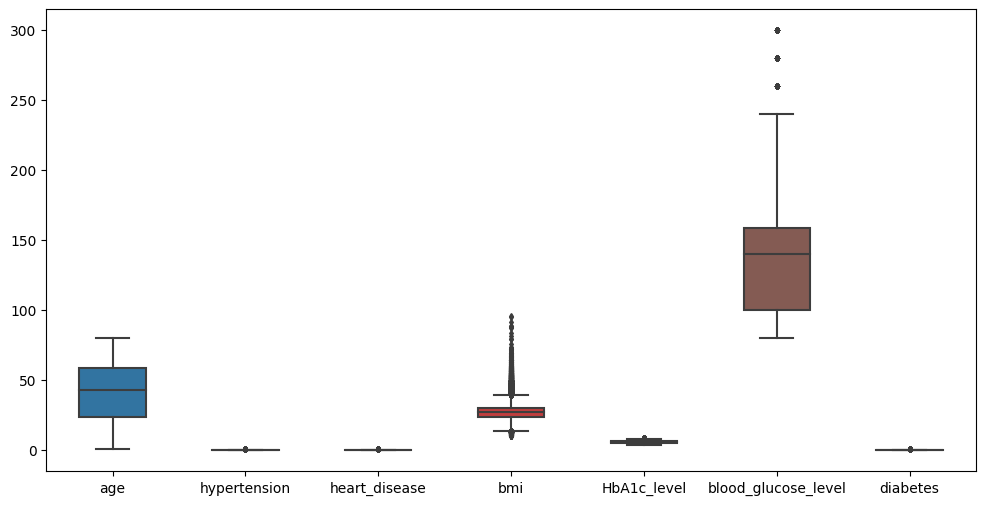

In [ ]:
#plotting outliers
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=Diabetes1, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
# Calculate the correlation of each feature with the target variable
correlation_with_target = Diabetes1.corr()['diabetes']

# Print correlations sorted by absolute value
print(correlation_with_target.apply(np.abs).sort_values(ascending=False))

diabetes               1.000000
blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264962
bmi                    0.214932
hypertension           0.195710
heart_disease          0.170711
Name: diabetes, dtype: float64


<ipython-input-13-8cbdb530ffe9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = Diabetes1.corr()['diabetes']


<ipython-input-14-3313cf063ea7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Diabetes1.corr(), annot=True)


<Axes: >

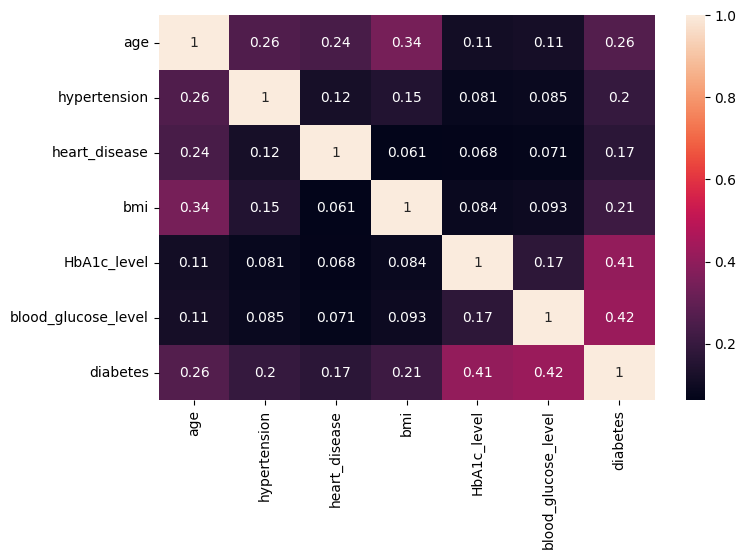

In [ ]:
#plotting correlations as a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(Diabetes1.corr(), annot=True)

## **Feature engineering (encoding from categorical to numerical, normalization)**

The first dataset contains two categorical columns which are 'gender' and 'smoking_history' so we will perform encoding on these two columns to transform their values into numerical values.

In [ ]:
# Get unique categorical values in 'gender'
unique_values = Diabetes1['gender'].unique()

print(unique_values)

['Female' 'Male' 'Other']


In [ ]:
#encoding each categorical value in gender column to numerical values of 0,1,2
gender_con={'Male':0,'Female':1,'Other':2}
Diabetes1['gender'].replace(gender_con,inplace=True)
Diabetes1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
Diabetes1.drop(Diabetes1.loc[Diabetes1['gender'] ==2].index, inplace=True)
#Diabetes1 = Diabetes1[Diabetes1['gender'] != 'Other']
Diabetes1.shape
#print(Diabetes1.loc[Diabetes1['gender'] == 2])

(96128, 9)

In [ ]:
# Get unique categorical values in 'smoking_history'
unique_values = Diabetes1['smoking_history'].unique()

print(unique_values)

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
#encoding each categorical value in smoking_history column to numerical values of 0,1,2,3
smoking_history_con={'No Info':0,'never':1, 'ever':1,'not current':2,'former':2,'current':3}
Diabetes1['smoking_history'].replace(smoking_history_con,inplace=True)
Diabetes1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,3,23.45,5.0,155,0
4,0,76.0,1,1,3,20.14,4.8,155,0


In [ ]:
#checking the new datatypes of encoded columns
Diabetes1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  int64  
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  int64  
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


<Axes: >

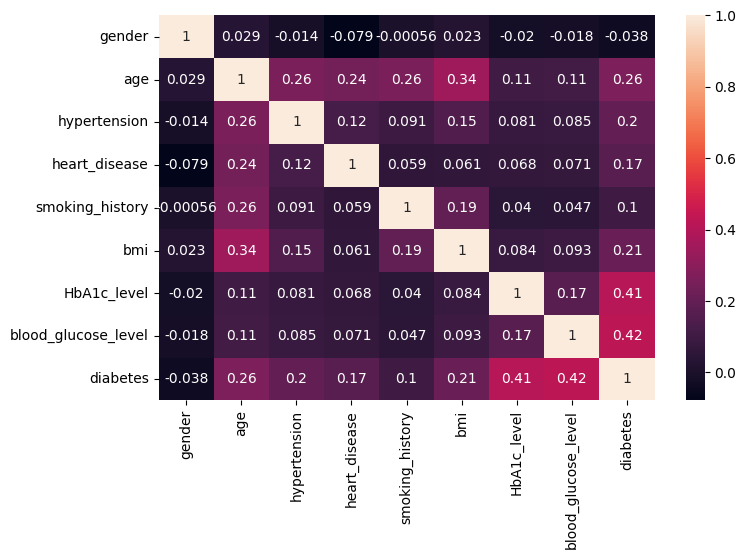

In [ ]:
#plotting correlations heatmap after the encoding of categorical columns
plt.figure(figsize=(8,5))
sns.heatmap(Diabetes1.corr(), annot=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#A function to normalize all features in a Dataset to be in a range of 0 to 1 using MinMaxScaler.
#the parameter passed is the dataset to be normalized
#the normalized dataset will be used when building ML models
def normalize_dataset_inplace(df):
    # initializes a MinMaxScaler
    scaler = MinMaxScaler()
    # loop to apply the scaler to all dataset columns
    for col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])


normalize_dataset_inplace(Diabetes1)
#checking the new range of the normalized dataset
Diabetes1.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,0.584231,0.516470,0.077615,0.040810,0.337394,0.202048,0.369570,0.264627,0.088237
std,0.492857,0.284242,0.267567,0.197851,0.314024,0.078989,0.195132,0.185960,0.283640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.291139,0.000000,0.000000,0.000000,0.156279,0.236364,0.090909,0.000000
50%,1.000000,0.531646,0.000000,0.000000,0.333333,0.202031,0.418182,0.272727,0.000000
75%,1.000000,0.734177,0.000000,0.000000,0.666667,0.231676,0.490909,0.359091,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Second dataset***

## **Loading the second dataset**

The second dataset is a collection of records of patients along with their
health data to predict based on diagnostic and health measurements whether a patient has diabetes(class 1)
or not(class 0). This dataset consists of 768 records of patients and includes 9
features which are pregnancies, glucose, blood pressure, skin thickness, insulin, body mass index (BMI),
diabetes pedigree, age and Outcome which is the target variable being predicted.

In [ ]:
Diabetes2= pd.read_csv("/content/drive/MyDrive/ML_project/diabetes.csv")
Diabetes2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
Diabetes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Diabetes2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Data cleaning and preprocessing**

In [ ]:
#searching for missing values in each column
Diabetes2.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
#searching for duplicates records in the dataset
Diabetes2.duplicated().any()

False

In [ ]:
#fixing inconsistent values in the dataset

#some values are impossible to be zero like a human BMI, bloodpressure ..etc, so we consider the zero values
#as missing values and we replace them with the mean of the corresponding column
Diabetes2['BMI'] = Diabetes2['BMI'].replace(0,Diabetes2['BMI'].mean())
Diabetes2['BloodPressure'] = Diabetes2['BloodPressure'].replace(0,Diabetes2['BloodPressure'].mean())
Diabetes2['Glucose'] = Diabetes2['Glucose'].replace(0,Diabetes2['Glucose'].mean())
Diabetes2['Insulin'] = Diabetes2['Insulin'].replace(0,Diabetes2['Insulin'].mean())
Diabetes2['SkinThickness'] = Diabetes2['SkinThickness'].replace(0,Diabetes2['SkinThickness'].mean())

In [ ]:
#checking the new minimum values of the fixed columns
Diabetes2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **EDA of the second dataset**

<Axes: >

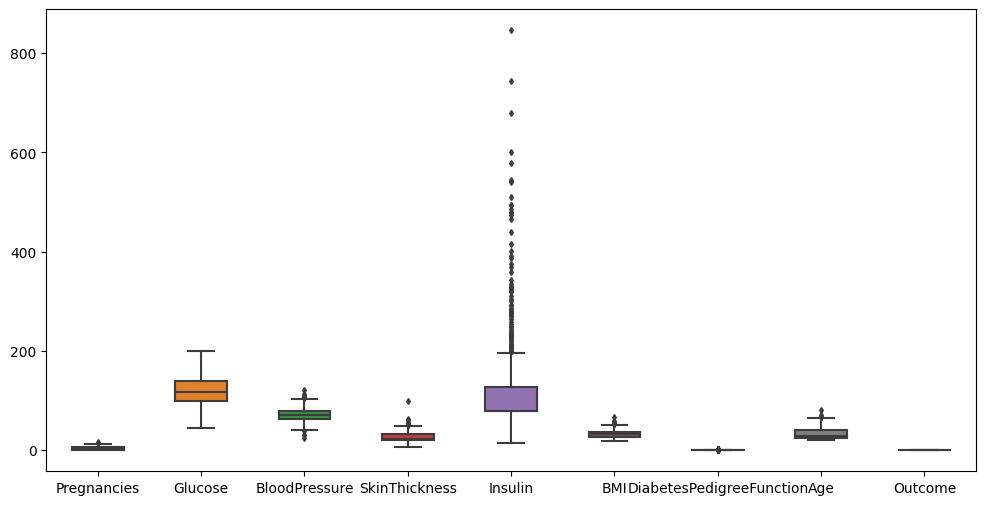

In [ ]:
#plotting outliers
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=Diabetes2, width= 0.5,ax=ax,  fliersize=3)

<Axes: >

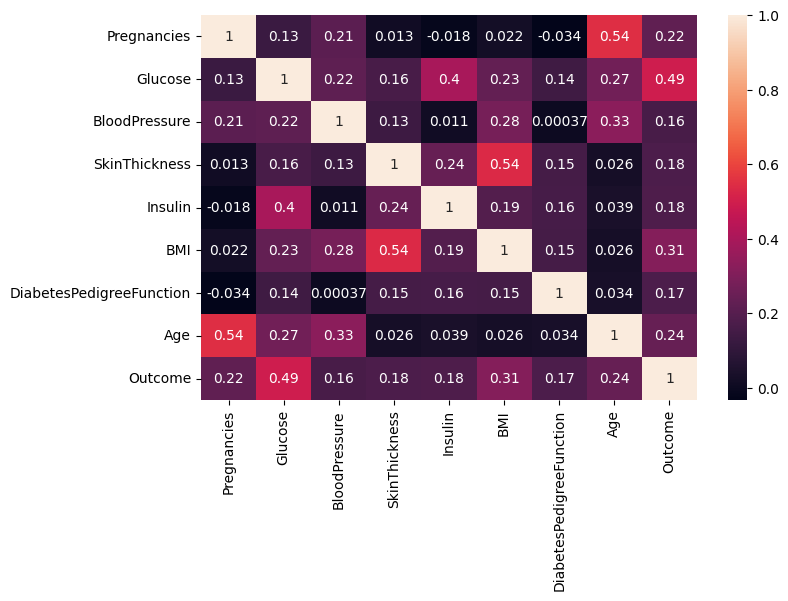

In [ ]:
#plotting correlations of each feature with the target variable
plt.figure(figsize=(8,5))
sns.heatmap(Diabetes2.corr(), annot=True)

## **Feature engineering**

The second dataset doesn't contain any categorical columns, so we will only perform Normalization on this dataset as a feature engineering technique.

In [ ]:
#Normalization applied on the second dataset to be in a range of 0 to 1 for each column values
#the normalized dataset will be used when building ML models
#we used the previously user-defined function for normalization
normalize_dataset_inplace(Diabetes2)
#checking the new range of the normalized dataset
Diabetes2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501172,0.492396,0.213114,0.125793,0.291428,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123632,0.104687,0.111875,0.140601,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.147135,0.079086,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.489796,0.173913,0.079086,0.282209,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Logistic Regression (LR)***

This section of the notebook focuses on building a Logistic Regression model that will be trained on both of the two datasets to generate predictions, then evaluating the model by using several evaluation metrices as well as enhancing the model performance by performing some experiments such as hyperparameters tunning, finding optimal threshold.. etc.

## **LR on the first dataset**

**Data splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# a user-defined function that receives a dataset and splits it into 20% testing and 80% training
def split_dataset_train_test(df):
    # Split predictors from the target variable
    # the last column is the target and the rest are predictors features
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

print("function defined")

function defined


In [ ]:
X_train, X_test, y_train, y_test= split_dataset_train_test(Diabetes1)

**LR model initialization, training and performing Cross validation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize LR model
LR_model = LogisticRegression(max_iter=1000)  # Increased number of iterations for convergence

# Fit the model on the training data
LR_model.fit(X_train, y_train)

# Perform cross-validation on the training set to test model generalization
cv_scores = cross_val_score(LR_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores of LR model: ", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score of LR model: ", cv_scores.mean())

Cross-validation scores of LR model:  [0.95910539 0.96066576 0.95864759 0.95988296 0.9576723 ]
Mean cross-validation score of LR model:  0.9591948014155237


**LR model evaluation using Accuracy, Precision, Recall and F1 scores**

In [ ]:
from sklearn.metrics import confusion_matrix

#a function to assess the performance of any ML model
#by passing The true labels and predicted labale of the test set as Parameters
def assess_model_performance(y_test, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # calculate Accuracy, Precision, Recall
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    # calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall)

    ## print Accuracy, Precision, Recall, F1 scores and confusion_matrix
    print("Accuracy=", accuracy)
    print("Precisions=", precision)
    print("Recalls=", recall)
    print("F1 Score=", f1_score)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\n Confusion matrix:")
    print(conf_matrix)


print("function defined successfully")

function defined successfully


In [ ]:
#generate predictions on the test set and evaluate them
y_pred = LR_model.predict(X_test)
assess_model_performance(y_test, y_pred)

Accuracy= 0.9570373452616249
Precisions= 0.8606760098928277
Recalls= 0.6137566137566137
F1 Score= 0.7165408373369938

 Confusion matrix:
[[17356   169]
 [  657  1044]]


The results of LR model evaluation show that:
*   accuracy=95.7% of total predictions were correct
*   Precisions=86.06% of predicted paitents with diabetes actually had diabetes
*   recall= out of all the patients who actually have diabetes, the LR model only identifies 61% of them. higher recall is a priority here
*   low F1 because recall and Precisions are not balanced(lower recall)

**Plot the learning curve**

In [ ]:
from sklearn.model_selection import learning_curve
#user-defined function used to calculate the training scores and cross-validation scores for different sizes of the training set.
#it returns a plot showing how the training and validation scores of the model evolve as more data is used for training.
#it can help understand if the model or estimator is underfitting or overfitting.

def plot_learning_curve(estimator, X_train, y_train, title="Learning Curve", cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

print("function defined")

function defined


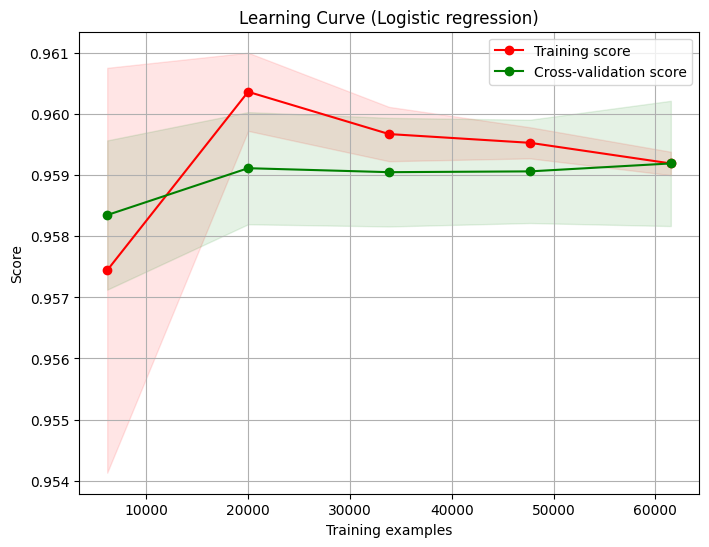

In [ ]:
plot_learning_curve(LR_model, X_train, y_train, title="Learning Curve (Logistic regression)")
plt.show()

**Adjusting the threshold of LR model and finding the optimal threshold**

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

#a function to find optimal threshold for a LR model using Precision-Recall curve.
#passed parameters are the LR model, the training data and true lables for training data
def find_optimal_threshold(LR_model, X_train, y_train):

    # Compute precision-recall pairs for different probability thresholds.
    precision, recall, thresholds = precision_recall_curve(y_train, LR_model.predict_proba(X_train)[:,1])

    # Compute fscores
    fscores = 2*(precision * recall) / (precision + recall)

    # Print Precision, recall, thresholds, Fscores
    print("Precisions:", precision[:5])
    print("Recalls:", recall[:5])
    print("Thresholds:", thresholds[:5])
    print("Fscores:", fscores[:5])

    # Find the optimal threshold with highest F score.
    optimal_idx = np.argmax(fscores)

    print("Optimal threshold:", thresholds[optimal_idx])
    print("F score:", fscores[optimal_idx])

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 4))
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.plot(recall[optimal_idx], precision[optimal_idx], 'or') # mark the optimal point
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

print("function defined successfully")

function defined successfully


In [ ]:
#checking whether the classes of the dataset are balanced or not
class_distribution = Diabetes1['diabetes'].value_counts(normalize=True)
print(class_distribution)

0.0    0.911763
1.0    0.088237
Name: diabetes, dtype: float64


Since the first dataset is imbalanced it can affect the precision-recall curve and the optimal threshold. The curve is directly influenced by the number of positive (minority class) and negative (majority class) instances. so in our case the curve might be skewed towards one class, and the optimal threshold might not generalize well. so to avoid this issue we will perform Data augmentation by using SMOTE technique, which is a strategy that can help improve the performance of a model by increasing the size and diversity of the training data for the minority class (positive class ).

In [ ]:
from imblearn.over_sampling import SMOTE
# creating a smote object and use it with fit_resample()
#to create new examples of the minority class(diabetes=1) in the training set
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

Precisions: [0.5        0.50000357 0.50000713 0.5000107  0.50001426]
Recalls: [1. 1. 1. 1. 1.]
Thresholds: [3.17540774e-07 3.83788797e-07 3.83913684e-07 4.02330786e-07
 4.03122322e-07]
Fscores: [0.66666667 0.66666984 0.666673   0.66667617 0.66667934]
Optimal threshold: 0.0531952013125948
F score: 0.8892415408924971


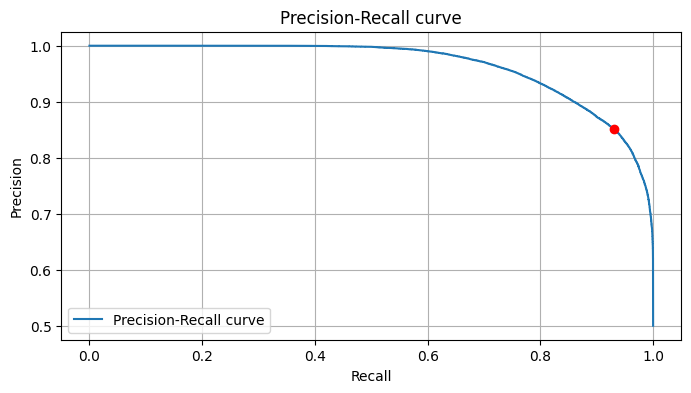

In [ ]:
#finding the optimal threshold by using the previously user-defined function
find_optimal_threshold(LR_model, X_res, y_res)


In [ ]:
# Adjusting the threshold down from 0.5 to the optimal threshold which is 0.05

# Any data point with a probability  of 0.05 or higher will be classified as 1.
OPTIMAL_THRESHOLD = 0.05

y_pred = np.where(LR_model.predict_proba(X_res)[:,1] >= OPTIMAL_THRESHOLD, 1, 0)
print(y_pred[:5]) #print the first 5 model predictions for y-labels based on the adjusted threshold

y_pred_proba= LR_model.predict_proba(X_res)[:,1]
print(y_pred_proba[:5]) #print the first 5 model predictions for the prprobabilities of pos class


## calculate Accuracy, Precision, Recall, f1scores
#after adjusting the threshold down from 0.5 to 0.05
print("LR model performance after adjusting the threshold down from 0.5 to 0.05:")
assess_model_performance(y_res, y_pred)

[0 1 0 0 0]
[7.60803930e-07 9.93746854e-01 1.56700537e-03 1.34608286e-03
 4.23962404e-03]
LR model performance after adjusting the threshold down from 0.5 to 0.05:
Accuracy= 0.8827954535731093
Precisions= 0.8462858322367572
Recalls= 0.9355114730251993
F1 Score= 0.8886646120499881

 Confusion matrix:
[[58206 11915]
 [ 4522 65599]]


**Compute AUC and ploting ROC curve**

In [ ]:
from sklearn.metrics import  roc_auc_score, roc_curve

#a function to plot ROC curve and compute AUC for a Logistic Regression model.
#passed parameters are the LR model, the training data and true lables for training data
def plot_roc_curve(LR_model, X_train, y_train):
    #define metrics
    y_pred_proba = LR_model.predict_proba(X_train)[::,1]

    fpr, tpr, thresholds = metrics.roc_curve(y_train,  y_pred_proba, pos_label=1)

    #Compute Area Under the Curve (AUC)
    auc = metrics.roc_auc_score(y_train, y_pred_proba)

    #Plot ROC curve
    plt.figure(figsize=(8, 4))
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

print("function defined successfully")

function defined successfully


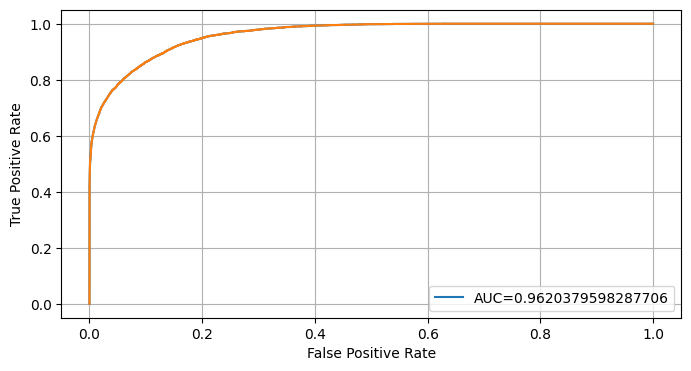

In [ ]:
#plotting the ROC AUC by using the previously user-defined function
plot_roc_curve(LR_model, X_train, y_train)


**hyperparameters tunning of logistic regression model**

In [ ]:
#first hyperparameters tunning which concentrate on "recall" as the scoring value of the GridSearchCV.(increases recall to reduce FN)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500, 1000]
}

# Create a base model
logreg_model = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, verbose=2, scoring='recall')

# fitting on training sets
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=e

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=elasticnet; tot

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=elasticnet; t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=el

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.3s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, clas

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=500, penalty=none; total time=   0.4s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, cla

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=elasticnet; total time=   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_wei

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_we

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=   0.0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet; to

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.5s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=elasticnet; total

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=elasticnet; t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=el

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.3s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=100, cla

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_val

[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='recall', verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
# Set the best parameters for the LR model
LR_model.set_params(C=0.1, class_weight='balanced', max_iter=100, penalty='l2')

# retrain the tunned LR model on the trainig set
LR_model.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight='balanced')

In [ ]:
from sklearn.metrics import confusion_matrix
#make prediction on the test set by using the tunned LR model
y_pred = LR_model.predict(X_test)

## calculate Accuracy, Precision, Recall and F1 score after the first hyperparameters tunning
print("LR model performance after the first hyperparameters tunning:")
assess_model_performance(y_test, y_pred)

LR model performance after the first hyperparameters tunning:
Accuracy= 0.885103505669406
Precisions= 0.4270534175761057
Recalls= 0.8741916519694297
F1 Score= 0.5737989581323558

 Confusion matrix:
[[15530  1995]
 [  214  1487]]


In [ ]:
#Second hyperparameters tunning which concentrate on "f1" as the scoring value of the GridSearchCV.(balancing both recall and precision)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500, 1000]
}

# Create a base model
logreg_model = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, verbose=2, scoring='f1')

# fitting on training sets
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.8s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=e

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.4s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=none; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=elasticnet; tot

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=el

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weig

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, cla

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=elasticnet; total time=   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_wei

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_we

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=   0.0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet; to

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.4s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=10, cl

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.3s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.3s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.1s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_w

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.2s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=elasticnet; total

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=elasticnet; t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=el

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.2s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.2s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.3s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.4s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.4s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.4s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.3s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.4s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.3s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.4s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=100, clas

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=100, cla

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=none; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_val

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1', verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'none'}


In [ ]:
# Set the best parameters for the LR model
LR_model.set_params(C=0.01, class_weight=None, max_iter=100, penalty=None)

# retrain the tunned LR model on the trainig set
LR_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.01, penalty=None)

In [ ]:
from sklearn.metrics import confusion_matrix

#make prediction on the test set by using the tunned LR model
y_pred = LR_model.predict(X_test)

## calculate Accuracy, Precision, Recall and F1 score after the second hyperparameters tunning
print("LR model performance after the second hyperparameters tunning:")
assess_model_performance(y_test, y_pred)

LR model performance after the second hyperparameters tunning:
Accuracy= 0.9571413710600228
Precisions= 0.8567941415785191
Recalls= 0.6190476190476191
F1 Score= 0.7187713310580205

 Confusion matrix:
[[17349   176]
 [  648  1053]]


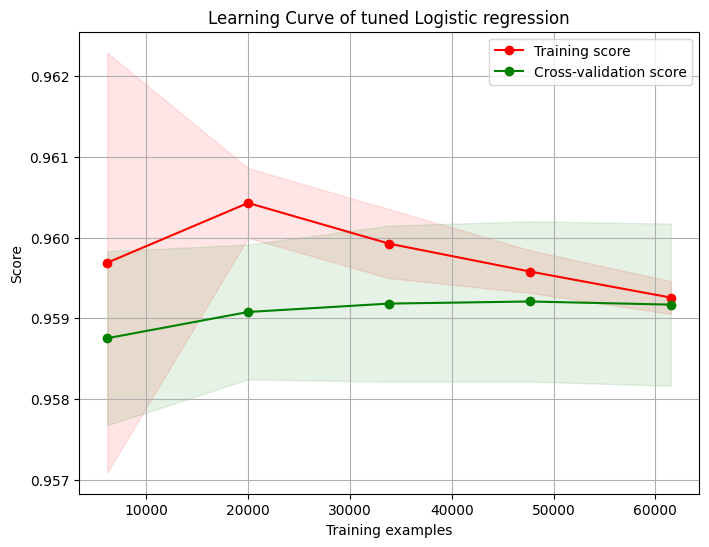

In [ ]:
plot_learning_curve(LR_model, X_train, y_train, title="Learning Curve of tuned Logistic regression")
plt.show()

**New try of LR after dropping gender and smoking_history columns of the first dataset**

This experiment focuses on assessing the LR model performance after performing feature selection by dropping two columns of the dataset which are 'gender' and 'smoking_history' since they are the least correlated with our target variable, and they are not considered as important factors for predicting diabetes compared to other medical factors such as insulin level, glucose and so on.

In [ ]:
from sklearn.model_selection import train_test_split

#Split predictors from the target variable
#the last column is the target
#the rest are predictors features without gender and smoking_history
X = Diabetes1.drop(Diabetes1.columns[[0, 4, -1]], axis=1)
y = Diabetes1.iloc[:, -1]

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize LR model to use it on the new selected features of the dataset
LR_model = LogisticRegression(max_iter=1000)  # Increased number of iterations for convergence

# Fit the model on the training data
LR_model.fit(X_train, y_train)


# Perform cross-validation on the training set to test model generalization
cv_scores = cross_val_score(LR_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores of LR model: ", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score of LR model: ", cv_scores.mean())

Cross-validation scores of LR model:  [0.95910539 0.961706   0.95845254 0.95994798 0.9579974 ]
Mean cross-validation score of LR model:  0.9594418620105245


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = LR_model.predict(X_test)

## calculate Accuracy, Precision, Recall and F1scores
print("LR model performance after dropping gender and smoking history features:")
assess_model_performance(y_test, y_pred)

LR model performance after dropping gender and smoking history features:
Accuracy= 0.9572974097576199
Precisions= 0.8678929765886287
Recalls= 0.6102292768959435
F1 Score= 0.7166033828098032

 Confusion matrix:
[[17367   158]
 [  663  1038]]


## **LR on the second dataset**

**Data splitting for the second dataset**

In [ ]:
#Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test= split_dataset_train_test(Diabetes2)

**LR model initialization, training and performing Cross validation**

In [ ]:
# Initialize LR model
LR_model = LogisticRegression(max_iter=1000)  # Increased number of iterations for convergence

# Fit the model on the training data
LR_model.fit(X_train, y_train)


# Perform cross-validation on the training set to test model generalization
cv_scores = cross_val_score(LR_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores of LR model: ", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score of LR model: ", cv_scores.mean())

Cross-validation scores of LR model:  [0.73170732 0.80487805 0.7398374  0.74796748 0.7704918 ]
Mean cross-validation score of LR model:  0.7589764094362256


**LR Model evaluation**

In [ ]:
#generate predictions on the test set and evaluate them
y_pred = LR_model.predict(X_test)
## calculate Accuracy, Precision, Recall and F1scores
assess_model_performance(y_test, y_pred)

Accuracy= 0.7792207792207793
Precisions= 0.7333333333333333
Recalls= 0.6
F1 Score= 0.6599999999999999

 Confusion matrix:
[[87 12]
 [22 33]]


**Ploting the learning curve**

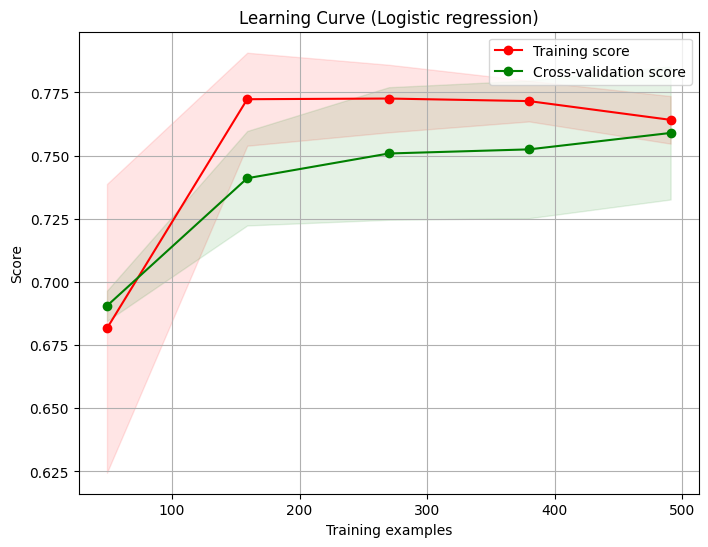

In [ ]:
plot_learning_curve(LR_model, X_train, y_train, title="Learning Curve (Logistic regression)")
plt.show()

**Adjusting the threshold of LR model and finding the optimal threshold**

In [ ]:
#checking whether the classes of the second dataset are balanced or not
class_distribution = Diabetes2['Outcome'].value_counts(normalize=True)
print(class_distribution)

0.0    0.651042
1.0    0.348958
Name: Outcome, dtype: float64


Since the second dataset is imbalanced it can affect the precision-recall curve and the optimal threshold. The curve is directly influenced by the number of positive (minority class) and negative (majority class) instances. so in our case the curve might be skewed towards one class, and the optimal threshold might not generalize well. so to avoid this issue we will perform Data augmentation by using SMOTE technique, which is a strategy that can help improve the performance of a model by increasing the size and diversity of the training data for the minority class (positive class ).

In [ ]:
from imblearn.over_sampling import SMOTE
# creating a smote object and use it with fit_resample()
#to create new examples of the minority class(diabetes=1) in the training set
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

Precisions: [0.5        0.50062422 0.50125    0.50187735 0.50250627]
Recalls: [1. 1. 1. 1. 1.]
Thresholds: [0.03115911 0.03640552 0.03663001 0.04065961 0.04191972]
Fscores: [0.66666667 0.6672213  0.66777685 0.66833333 0.66889074]
Optimal threshold: 0.25275093563789996
F score: 0.7916666666666667


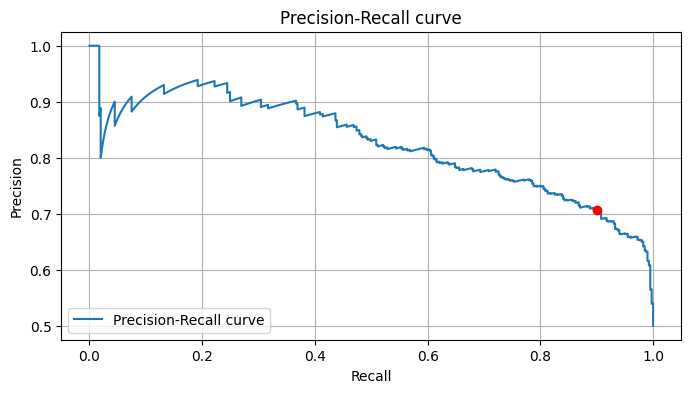

In [ ]:
 # Plot the Precision-Recall curve and finding optimal threshold

find_optimal_threshold(LR_model, X_res, y_res)

In [ ]:
# Adjusting the threshold down from 0.5 to the optimal threshold 0.25

# Any data point with a probability  of 0.25 or higher will be classified as 1.
OPTIMAL_THRESHOLD = 0.25

y_pred = np.where(LR_model.predict_proba(X_res)[:,1] >= OPTIMAL_THRESHOLD, 1, 0)
print(y_pred[:5]) #print the first 5 model predictions for y-labels based on the adjusted threshold

y_pred_proba= LR_model.predict_proba(X_res)[:,1]
print(y_pred_proba[:5]) #print the first 5 model predictions for the prprobabilities of pos class


## calculate Accuracy, Precision, Recall, f1scores
#after adjusting the threshold down from 0.5 to 0.25
print("LR model performance after adjusting the threshold down from 0.5 to 0.25:")
assess_model_performance(y_res, y_pred)

[0 1 1 1 1]
[0.08885326 0.44560489 0.28862783 0.54304321 0.6733132 ]
LR model performance after adjusting the threshold down from 0.5 to 0.25:
Accuracy= 0.7605985037406484
Precisions= 0.7029126213592233
Recalls= 0.9027431421446384
F1 Score= 0.7903930131004366

 Confusion matrix:
[[248 153]
 [ 39 362]]


**Compute AUC and ploting ROC curve**

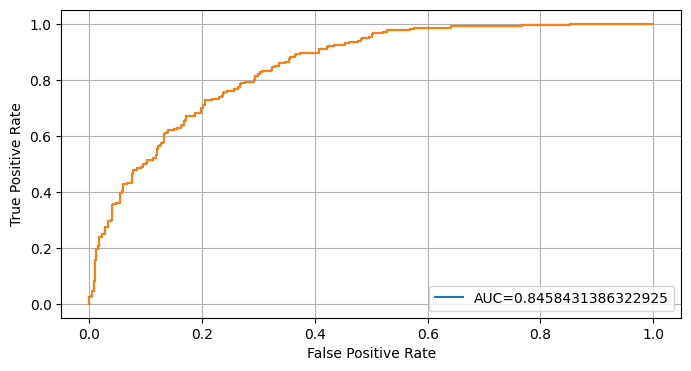

In [ ]:
 #Plot ROC curve

plot_roc_curve(LR_model, X_train, y_train)

**hyperparameters tunning of logistic regression model**

In [ ]:
#first hyperparameters tunning which concentrate on "recall" as the scoring value of the GridSearchCV.(increases recall to reduce FN)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500, 1000]
}

# Create a base model
logreg_model = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, verbose=2, scoring='recall')

# fitting on training sets
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, clas

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; tot

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour


[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=50

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...C=1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11


[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=1, class_weight=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV] END .C=1, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END ..C=1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_we

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/pyth

[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=500, penalty=l1; total time=   0.0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END .C=10, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END .C=10, class_weight

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/pyth

[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2; total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=el

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total tim

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='recall', verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'none'}


In [ ]:
# Set the best parameters for the LR model
LR_model.set_params(C=0.01, class_weight='balanced', max_iter=100, penalty='none')

# retrain the tunned LR model on the trainig set
LR_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.01, class_weight='balanced', penalty='none')

In [ ]:
#make prediction on the test set by using the tunned LR model
y_pred = LR_model.predict(X_test)

## calculate Accuracy, Precision, Recall and F1 score after the first hyperparameters tunning
print("LR model performance after the first hyperparameters tunning:")
assess_model_performance(y_test, y_pred)

LR model performance after the first hyperparameters tunning:
Accuracy= 0.7012987012987013
Precisions= 0.5652173913043478
Recalls= 0.7090909090909091
F1 Score= 0.6290322580645161

 Confusion matrix:
[[69 30]
 [16 39]]


In [ ]:
#Second hyperparameters tunning which concentrate on "f1" as the scoring value of the GridSearchCV.(balancing both recall and precision)
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500, 1000]
}

# Create a base model
logreg_model = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, verbose=2, scoring='f1')

# fitting on training sets
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=elasticnet; total time=  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=none;

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.01, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2; t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END .C=0.1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END .C=0.1, class_we

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=non

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV] END .C=1, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END ...C=1, class_weight=None, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=1, class_wei

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=10,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_i

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=none; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ..C=10, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ..C=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10, class_weight=None, max_iter=1000, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=elasticnet; total

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalt

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END .C=100, class_weight=None, max_iter=100, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=none; total tim

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=none; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END C=100, class_we

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1', verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
# Set the best parameters for the LR model
LR_model.set_params(C=1, class_weight='balanced', max_iter=100, penalty='l2')

# retrain the tunned LR model on the trainig set
LR_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced')

In [ ]:
#make prediction on the test set by using the tunned LR model
y_pred = LR_model.predict(X_test)

## calculate Accuracy, Precision, Recall and F1 score after the second hyperparameters tunning
print("LR model performance after the second hyperparameters tunning:")
assess_model_performance(y_test, y_pred)

LR model performance after the second hyperparameters tunning:
Accuracy= 0.6948051948051948
Precisions= 0.5588235294117647
Recalls= 0.6909090909090909
F1 Score= 0.6178861788617886

 Confusion matrix:
[[69 30]
 [17 38]]


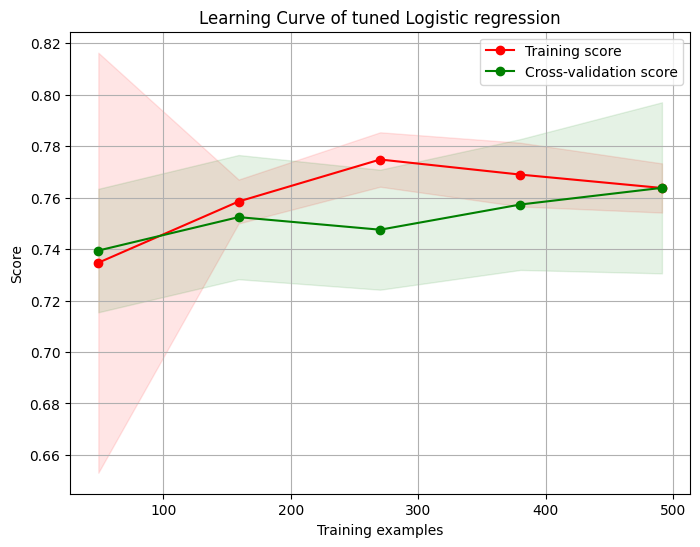

In [ ]:
#ploting the learning curve after hyperparameters tunning
plot_learning_curve(LR_model, X_train, y_train, title="Learning Curve of tuned Logistic regression")
plt.show()

**New try of LR after dropping BloodPressure and DiabetesPedigreeFunction columns of the second dataset**

This experiment focuses on assessing the LR model performance after performing feature selection by dropping two columns of the second dataset which are 'BloodPressure' and 'DiabetesPedigreeFunction' since they are the least correlated with our target variable which is the outcome of diabetes status.

In [ ]:
#Split predictors from the target variable
#the last column is the target
#the rest are predictors features without BloodPressure and DiabetesPedigreeFunction
X = Diabetes2.drop(Diabetes2.columns[[2, 6, -1]], axis=1)
y = Diabetes2.iloc[:, -1]

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize LR model to use it on the new selected features of the dataset
LR_model = LogisticRegression(max_iter=1000)  # Increased number of iterations for convergence

# Fit the model on the training data
LR_model.fit(X_train, y_train)


# Perform cross-validation on the training set to test model generalization
cv_scores = cross_val_score(LR_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores of LR model: ", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score of LR model: ", cv_scores.mean())

Cross-validation scores of LR model:  [0.71544715 0.80487805 0.75609756 0.7398374  0.77868852]
Mean cross-validation score of LR model:  0.758989737438358


In [ ]:
y_pred = LR_model.predict(X_test)

## calculate Accuracy, Precision, Recall and F1scores
print("LR model performance after dropping BloodPressure and DiabetesPedigreeFunction features:")
assess_model_performance(y_test, y_pred)

LR model performance after dropping BloodPressure and DiabetesPedigreeFunction features:
Accuracy= 0.7597402597402597
Precisions= 0.6875
Recalls= 0.6
F1 Score= 0.6407766990291262

 Confusion matrix:
[[84 15]
 [22 33]]


# ***Neural Network (NN)***

This section of the notebook focuses on building a Neural Network model that will be trained on both of the two datasets to generate predictions, then evaluating the model by using several evaluation metrices as well as enhancing the model performance by performing some experiments such as hyperparameters tunning.

## **NN on the first dataset**

**Data splitting into training/testing/validation sets**

In [ ]:
from sklearn.model_selection import train_test_split

# a function that recieves a dataset and split it into train/test/validation sets
# with the following percentages: 70% training, 15% validation, 15% testing

def train_test_val_dataSplit(dataset, test_size=0.3, val_size=0.5):
    #Split predictors from the target variable
    #the last column is the target and the rest are predictors features
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    # first step is splitting the dataset into a training set and a temporary set using a 70/30 split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=42)

    # second step is splitting the temporary set (30% of data) into a validation and testing set using a 50/50 split
    # so testing set = 15% of data, and validation set= 15% of data.
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

print('function defined successfully')



function defined successfully


In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_dataSplit(Diabetes1)
# checking number of examples in each set
print(f"Number of training examples: {X_train.shape[0]}")
print(f"Number of validation examples: {X_val.shape[0]}")
print(f"Number of testing examples: {X_test.shape[0]}")

Number of training examples: 67289
Number of validation examples: 14419
Number of testing examples: 14420


**Neural Network model building and compiling**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import metrics

# a function for creating and compiling a neural network model
# the passed parameter is a specified learning rate
def create_NN_model(my_learning_rate):

  # initialize a new sequential model
  model = tf.keras.models.Sequential()

  # Define the input layer or the first hidden layer.
  # which 32 neurons and relu as an activation function
  # input shape=8 because we have 8 predictors as an input without the target
  model.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(8,)))

  # Define a dropout regularization layer with a dropout rate=20%.
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 1 because
  # the model must choose among 2 possible output values (representing
  # whether a patient has diabetes or not).
  # with 'sigmoid' as an activation function for binary classification
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # Construct the layers into a model that TensorFlow can execute.
  # compile the model by using Adam optimization algorithm
  # the loss function for binary classification is 'binary_crossentropy'
  # accuracy, precision, and recall are used as evaluation metrics for model performance
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss='binary_crossentropy',
                 metrics=[metrics.BinaryAccuracy(),
                          metrics.Precision(),
                          metrics.Recall()])

  return model

print('function defined successfuly')

function defined successfuly


In [ ]:
#building a neural network model
learning_rate = 0.003
NN_model = create_NN_model(learning_rate)

**Neural Network model training**

In [ ]:
# a function to plot a curve of one or more classification metrics vs. epoch or training history
# the passed parameters are the list of epoch, training history and the specefied evaluation metric
def plot_training_epochs_curve(epochs, hist, list_of_metrics):

  plt.figure()
  plt.xlabel("Epoch") #the plot x-axis represents number of epochs or training time
  plt.ylabel("Evaluation metric value") #the plot y-axis represents the value of the evaluation metric for each epoch

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("function defined successfuly")

function defined successfuly


In [ ]:
# a function to train a neural network model using training data for a specified number of epochs
# then it evaluates the model at the end of each training epochs by using validation data
# the function will return epochs number and the history of model training performance over each epoch
def train_NN_model(model, X_train, y_train, X_val, y_val, epochs, batch_size=None):

    history = model.fit(x=X_train,
                        y=y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        shuffle=True,
                        validation_data=(X_val, y_val))

    # gathering a snapshot to track the progression of model training over model's metrics at each epoch.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist, history

print("function defined successfuly")

function defined successfuly


Epoch 1/30
14/14 [==============================] - 1s 21ms/step - loss: 0.5513 - binary_accuracy: 0.8783 - precision: 0.0328 - recall: 0.0135 - val_loss: 0.4509 - val_binary_accuracy: 0.9106 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
14/14 [==============================] - 0s 5ms/step - loss: 0.4103 - binary_accuracy: 0.9122 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3756 - val_binary_accuracy: 0.9106 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 0s 5ms/step - loss: 0.3645 - binary_accuracy: 0.9122 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3557 - val_binary_accuracy: 0.9106 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
14/14 [==============================] - 0s 5ms/step - loss: 0.3456 - binary_accuracy: 0.9122 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3356 - val_binary_accuracy: 0.9106 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00

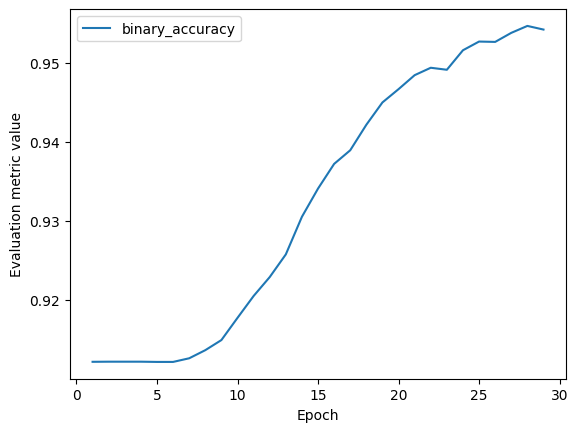

In [ ]:
# defining initial values for NN_model hyperprameters
epochs = 30
batch_size = 5000

# Train the model on the training set.
epochs, hist, history = train_NN_model(NN_model, X_train, y_train, X_val, y_val,
                           epochs, batch_size)

# Plot a graph of the evaluation metric vs. training epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_training_epochs_curve(epochs, hist, list_of_metrics_to_plot)

**Neural Network model evaluation**

In [ ]:
# Evaluate the NN_model against the test set using loss, binary_accuracy, precision and recall
print("Evaluate the new NN_model against the test set:")
NN_model.evaluate(x=X_test, y=y_test, batch_size=batch_size)

Evaluate the new NN_model against the test set:
3/3 [==============================] - 0s 4ms/step - loss: 0.1333 - binary_accuracy: 0.9536 - precision: 0.9349 - recall: 0.5148


[0.13329045474529266,
 0.953606128692627,
 0.9349363446235657,
 0.5147975087165833]

In [ ]:
#a function that plots a learning curve for the training and testing performance of the NN model
#passed parameters are num of epochs, and history of training and validation over each epoch
def plot_NN_learning_curve(history, epochs):

    # Get training and test accuracy histories
    training_accuracy = history.history['binary_accuracy']
    validation_accuracy = history.history['val_binary_accuracy']

    # Visualize accuracy history
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, training_accuracy, 'r--')
    plt.plot(epochs, validation_accuracy, 'b-')
    plt.legend(['training accuracy', 'validation accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('NN_model accuracy progression during training and validation')
    plt.show();

print("function defined successfuly")

function defined successfuly


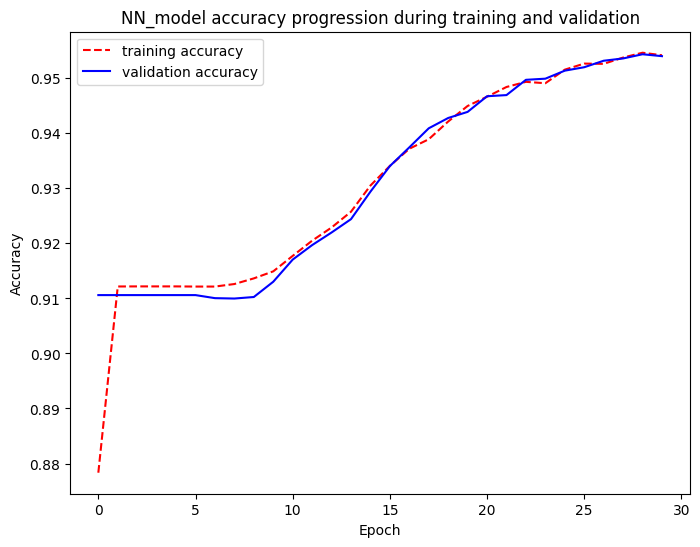

In [ ]:
#Visualize the NN model performance on both the training and validation sets
plot_NN_learning_curve(history, epochs)
print("\n")
print("\n")

**Neural Network model hyperparameters tunning**

first, we will perform a manual hyperparameters tuning by trying different learning rates values with different epochs, to see which performs better and to find the best configuration of the NN_model.

A smaller learning rate requires more training epochs, so with each experiment we will reduce the learning rate from 0.003 to 0.002 and to 0.001, and we will use more number of epochs than the previous number which was 30.

Epoch 1/40
14/14 [==============================] - 1s 19ms/step - loss: 0.5611 - binary_accuracy: 0.8884 - precision_1: 0.0860 - recall_1: 0.0281 - val_loss: 0.4943 - val_binary_accuracy: 0.9106 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/40
14/14 [==============================] - 0s 8ms/step - loss: 0.4589 - binary_accuracy: 0.9122 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.4173 - val_binary_accuracy: 0.9106 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/40
14/14 [==============================] - 0s 6ms/step - loss: 0.3981 - binary_accuracy: 0.9122 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.3761 - val_binary_accuracy: 0.9106 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/40
14/14 [==============================] - 0s 6ms/step - loss: 0.3675 - binary_accuracy: 0.9122 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.3560 - val_binary_accuracy: 0.9106 - val_precision_1: 0.000

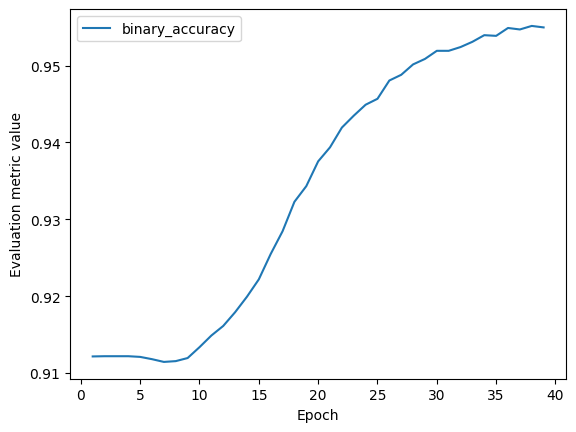

In [ ]:
# reducing the learning rate from 0.003 to 0.002
#building a neural network model with learning_rate = 0.002
learning_rate = 0.002
NN_model = create_NN_model(learning_rate)

# defining initial values for NN_model hyperprameters
epochs = 40
batch_size = 5000

# Train the model on the training set.
epochs, hist, history = train_NN_model(NN_model, X_train, y_train, X_val, y_val,
                           epochs, batch_size)

# Plot a graph of the evaluation metric vs. training epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_training_epochs_curve(epochs, hist, list_of_metrics_to_plot)

In [ ]:
# Evaluate the NN_model against the test set using loss, binary_accuracy, precision and recall
print("Evaluate NN_model after reducing learning rate to 0.002 against the test set:")
NN_model.evaluate(x=X_test, y=y_test, batch_size=batch_size)

Evaluate NN_model after reducing learning rate to 0.002 against the test set:
3/3 [==============================] - 0s 5ms/step - loss: 0.1290 - binary_accuracy: 0.9551 - precision_1: 0.9173 - recall_1: 0.5444


[0.12904196977615356,
 0.9550623893737793,
 0.9173228144645691,
 0.5443925261497498]

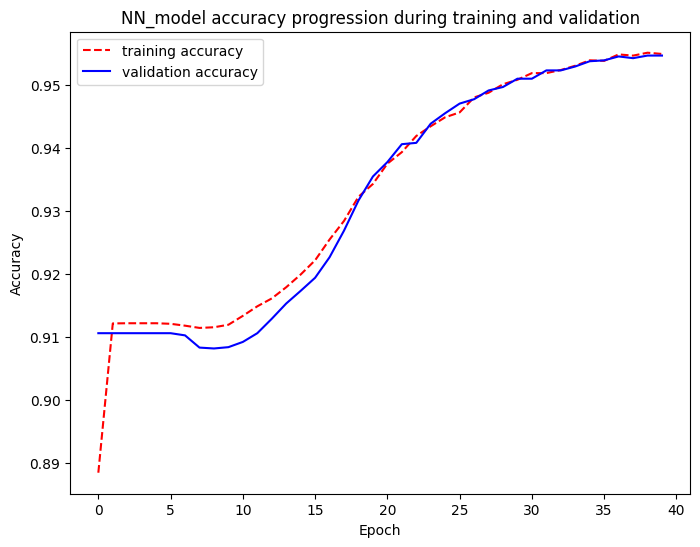

In [ ]:
#Visualize the NN model performance on both the training and validation sets
#after reducing learning rate to 0.002
plot_NN_learning_curve(history, epochs)
print("\n")
print("\n")

Epoch 1/60
14/14 [==============================] - 1s 17ms/step - loss: 0.6180 - binary_accuracy: 0.8434 - precision_2: 0.0491 - recall_2: 0.0426 - val_loss: 0.5867 - val_binary_accuracy: 0.9106 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/60
14/14 [==============================] - 0s 7ms/step - loss: 0.5678 - binary_accuracy: 0.9012 - precision_2: 0.0608 - recall_2: 0.0086 - val_loss: 0.5396 - val_binary_accuracy: 0.9106 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/60
14/14 [==============================] - 0s 5ms/step - loss: 0.5231 - binary_accuracy: 0.9103 - precision_2: 0.0493 - recall_2: 0.0012 - val_loss: 0.4959 - val_binary_accuracy: 0.9106 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/60
14/14 [==============================] - 0s 5ms/step - loss: 0.4803 - binary_accuracy: 0.9118 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.4526 - val_binary_accuracy: 0.9106 - val_precision_2: 0.0000e+00 - val_reca

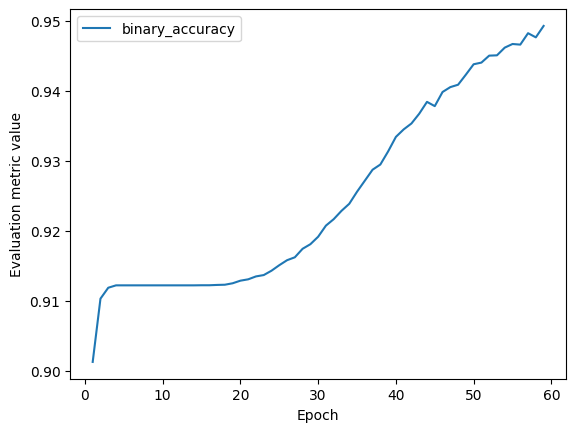

In [ ]:
#reducing the learning rate from 0.002 to 0.001
#building a neural network model with learning_rate = 0.001
learning_rate = 0.001
NN_model = create_NN_model(learning_rate)

# defining initial values for NN_model hyperprameters
epochs = 60
batch_size = 5000

# Train the model on the training set.
epochs, hist, history = train_NN_model(NN_model, X_train, y_train, X_val, y_val,
                           epochs, batch_size)

# Plot a graph of the evaluation metric vs. training epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_training_epochs_curve(epochs, hist, list_of_metrics_to_plot)

In [ ]:
# Evaluate the NN_model against the test set using loss, binary_accuracy, precision and recall
print("Evaluate NN_model after reducing learning rate to 0.001 against the test set:")
NN_model.evaluate(x=X_test, y=y_test, batch_size=batch_size)

Evaluate NN_model after reducing learning rate to 0.001 against the test set:
3/3 [==============================] - 0s 4ms/step - loss: 0.1456 - binary_accuracy: 0.9495 - precision_2: 0.9427 - recall_2: 0.4611


[0.1456356793642044,
 0.9495145678520203,
 0.9426751732826233,
 0.46105918288230896]

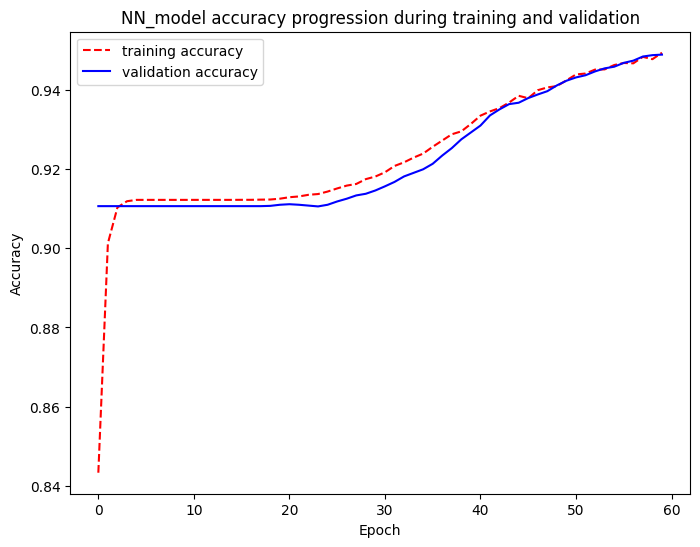

In [ ]:
#Visualize the NN model performance on both the training and validation sets
#after reducing learning rate to 0.001
plot_NN_learning_curve(history, epochs)
print("\n")
print("\n")

**Tuning batch size and number of epochs**

In [ ]:
!pip install scikeras ## to download and install scikeras package
import numpy
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In this experiment we will perform a GridSearch for tuning the batch size and the number of epochs.Their different values are specified in a dictionary and passed to GridSearchCV to find the best combinitation of these two hyperparameters.

In [ ]:
# create KerasClassifier model
model = KerasClassifier(model=create_NN_model, my_learning_rate=0.002, verbose=2)

# define the grid search parameters
batch_size = [64, 128, 512] #these values of batch sizes are common choices in tuning
epochs = [30, 40, 60]
param_grid = dict(batch_size=batch_size, epochs=epochs)

## grid search for the batch size and number of epochs
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best mean accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Epoch 1/40
1052/1052 - 2s - loss: 0.2338 - binary_accuracy: 0.9235 - precision_3: 0.6671 - recall_3: 0.2581 - 2s/epoch - 2ms/step
Epoch 2/40
1052/1052 - 1s - loss: 0.1297 - binary_accuracy: 0.9560 - precision_3: 0.8714 - recall_3: 0.5849 - 1s/epoch - 1ms/step
Epoch 3/40
1052/1052 - 1s - loss: 0.1226 - binary_accuracy: 0.9580 - precision_3: 0.8642 - recall_3: 0.6184 - 1s/epoch - 1ms/step
Epoch 4/40
1052/1052 - 1s - loss: 0.1206 - binary_accuracy: 0.9588 - precision_3: 0.8673 - recall_3: 0.6272 - 1s/epoch - 1ms/step
Epoch 5/40
1052/1052 - 1s - loss: 0.1183 - binary_accuracy: 0.9597 - precision_3: 0.8775 - recall_3: 0.6282 - 1s/epoch - 1ms/step
Epoch 6/40
1052/1052 - 1s - loss: 0.1170 - binary_accuracy: 0.9599 - precision_3: 0.8838 - recall_3: 0.6255 - 1s/epoch - 1ms/step
Epoch 7/40
1052/1052 - 1s - loss: 0.1159 - binary_accuracy: 0.9606 - precision_3: 0.8981 - recall_3: 0.6221 - 1s/epoch - 1ms/step
Epoch 8/40
1052/1052 - 2s - lo

**Tuning the number of Neurons in the hidden layers**

In the following experiment, the hyperparameter that we will try to optimize via cross-validation is the number of neurons in the first hidden layer.

In [ ]:
# First we need to create a function that creates the model (required for KerasClassifier)
# while accepting the hyperparameters we want to tune which is neurons
# we also pass some default values such as my_learning_rate

def create_NN_model_n(neurons, my_learning_rate=0.002):

  # initialize a new sequential model
  model = tf.keras.models.Sequential()

  # Define the input layer or the first hidden layer.
  # which neurons are the hyperparameter to tune and relu as an activation function
  # input shape=8 because we have 8 predictors as an input without the target
  model.add(tf.keras.layers.Dense(units=neurons, activation='relu', input_shape=(8,)))

  # Define a dropout regularization layer with a dropout rate=20%.
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 1 because
  # the model must choose among 2 possible output values (representing
  # whether a patient has diabetes or not).
  # with 'sigmoid' as an activation function for binary classification
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # Construct the layers into a model that TensorFlow can execute.
  # compile the model by using Adam optimization algorithm
  # the loss function for binary classification is 'binary_crossentropy'
  # accuracy, precision, and recall are used as evaluation metrics for model performance
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss='binary_crossentropy',
                 metrics=[metrics.BinaryAccuracy(),
                          metrics.Precision(),
                          metrics.Recall()])

  return model

print("function defined")

function defined


After defining the function that creates NN model with the hyperparameter we want to tune(num of neurons), next we will perform a GridSearch for tuning the neurons where different values of neurons are specified in a dictionary and passed to GridSearchCV to find the best result.

In [ ]:
# create KerasClassifier model
model = KerasClassifier(model=create_NN_model_n, epochs=40, batch_size=64, verbose=0)

# define the grid search parameters
neurons = [32,48,64,92,128] #powers of 2 as the number of neurons is a common choice
param_grid = dict(model__neurons=neurons)

## grid search for the number of nuerons in the first hidden layer.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best mean accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best mean accuracy: 0.970931 using {'model__neurons': 92}
0.970545 (0.000310) with: {'model__neurons': 32}
0.970842 (0.000420) with: {'model__neurons': 48}
0.970887 (0.000289) with: {'model__neurons': 64}
0.970931 (0.000420) with: {'model__neurons': 92}
0.970842 (0.000311) with: {'model__neurons': 128}


**Tuning the Activation Function in the hidden layers**

In the following experiment, the hyperparameter that we will try to optimize via cross-validation is the activation function type in the first hidden layer.

In [ ]:
# First we need to create a function that creates the model (required for KerasClassifier)
# while accepting the hyperparameters we want to tune which is activations
# we also pass some default values such as my_learning_rate

def create_NN_model_a(activations, my_learning_rate=0.002):

  # initialize a new sequential model
  model = tf.keras.models.Sequential()

  # Define the input layer or the first hidden layer.
  # which neurons=92 and the activation function is the hyperparameter to tune
  # input shape=8 because we have 8 predictors as an input without the target
  model.add(tf.keras.layers.Dense(units=92, activation=activations, input_shape=(8,)))

  # Define a dropout regularization layer with a dropout rate=20%.
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 1 because
  # the model must choose among 2 possible output values (representing
  # whether a patient has diabetes or not).
  # with 'sigmoid' as an activation function for binary classification
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # Construct the layers into a model that TensorFlow can execute.
  # compile the model by using Adam optimization algorithm
  # the loss function for binary classification is 'binary_crossentropy'
  # accuracy, precision, and recall are used as evaluation metrics for model performance
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss='binary_crossentropy',
                 metrics=[metrics.BinaryAccuracy(),
                          metrics.Precision(),
                          metrics.Recall()])

  return model

print("function defined")

function defined


After defining the function that creates NN model with the hyperparameter we want to tune(activations), next we will perform a GridSearch for tuning the activations where different types of activation functions are specified in a dictionary and passed to GridSearchCV to find the best result.

In [ ]:
#create KerasClassifier model
model = KerasClassifier(model=create_NN_model_a, epochs=40, batch_size=64, verbose=0)

# define the grid search parameters
activations = ['linear','sigmoid','relu']
param_grid = dict(model__activations=activations)

## grid search for activation function
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best mean accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best mean accuracy: 0.970753 using {'model__activations': 'relu'}
0.958730 (0.002088) with: {'model__activations': 'linear'}
0.959726 (0.000672) with: {'model__activations': 'sigmoid'}
0.970753 (0.000569) with: {'model__activations': 'relu'}


**Optimizing the model by trying different drop out rates for the regularization layer.**


In the following experiment, the hyperparameter that we will try to optimize via cross-validation is the drop out rate for the regularization layer.

In [ ]:
# First we need to create a function that creates the model (required for KerasClassifier)
# while accepting the hyperparameters we want to tune which is drop_rate
# we also pass some default values such as my_learning_rate

def create_NN_model_d(drop_rate, my_learning_rate=0.002):

  # initialize a new sequential model
  model = tf.keras.models.Sequential()

  # Define the input layer or the first hidden layer.
  # which neurons=92 and relu as an activation function
  # input shape=8 because we have 8 predictors as an input without the target
  model.add(tf.keras.layers.Dense(units=92, activation='relu', input_shape=(8,)))

  # Define a dropout regularization layer with a dropout rate that will be tuned
  model.add(tf.keras.layers.Dropout(rate=drop_rate))

  # Define the output layer. The units parameter is set to 1 because
  # the model must choose among 2 possible output values (representing
  # whether a patient has diabetes or not).
  # with 'sigmoid' as an activation function for binary classification
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # Construct the layers into a model that TensorFlow can execute.
  # compile the model by using Adam optimization algorithm
  # the loss function for binary classification is 'binary_crossentropy'
  # accuracy, precision, and recall are used as evaluation metrics for model performance
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss='binary_crossentropy',
                 metrics=[metrics.BinaryAccuracy(),
                          metrics.Precision(),
                          metrics.Recall()])

  return model

print("function defined")

function defined


In [ ]:
#create KerasClassifier model
model = KerasClassifier(model=create_NN_model_d, epochs=40, batch_size=64, verbose=0)

# define the grid search parameters
drop_rate = [0.1,0.2,0.3,0.4] #different values for the dropout rate to try
param_grid = dict(model__drop_rate=drop_rate)

## grid search for activation function
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best mean accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best mean accuracy: 0.970694 using {'model__drop_rate': 0.1}
0.970694 (0.000715) with: {'model__drop_rate': 0.1}
0.970456 (0.000247) with: {'model__drop_rate': 0.2}
0.970441 (0.000662) with: {'model__drop_rate': 0.3}
0.970159 (0.000950) with: {'model__drop_rate': 0.4}


**Setting the tuned hyperparameters values for the new tuned NN_model**

After performing the previous experiments where we tuned multiple hyperparameters of the NN_model such as batch size, num of epochs, num of neurons in the hidden layer, activation function type in the hidden layer and finally the drop out rate.
now we will use the obtained best values for these hyperparameters to build a new tuned NN_model, to train it on the training set and evaluate it's performance on testing set combared to the previous untuned NN_model.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import metrics
# a function for creating and compiling a new tuned neural network model
# the passed parameter is a specified learning rate
def create_tuned_NN_model(my_learning_rate):

  # initialize a new sequential model
  model = tf.keras.models.Sequential()

  # Define the input layer or the first hidden layer.
  # which 92 neurons and relu as an activation function
  # input shape=8 because we have 8 predictors as an input without the target
  model.add(tf.keras.layers.Dense(units=92, activation='relu', input_shape=(8,)))

  # Define a dropout regularization layer with a dropout rate=10%.
  model.add(tf.keras.layers.Dropout(rate=0.1))

  # Define the output layer. The units parameter is set to 1 because
  # the model must choose among 2 possible output values (representing
  # whether a patient has diabetes or not).
  # with 'sigmoid' as an activation function for binary classification
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # Construct the layers into a model that TensorFlow can execute.
  # compile the model by using Adam optimization algorithm
  # the loss function for binary classification is 'binary_crossentropy'
  # accuracy, precision, and recall are used as evaluation metrics for model performance
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss='binary_crossentropy',
                 metrics=[metrics.BinaryAccuracy(),
                          metrics.Precision(),
                          metrics.Recall()])

  return model

print('function defined successfuly')

function defined successfuly


In [ ]:
#building a neural network model
learning_rate = 0.002
NN_model_tuned = create_tuned_NN_model(learning_rate)

Epoch 1/35
1052/1052 [==============================] - 4s 3ms/step - loss: 0.1649 - binary_accuracy: 0.9462 - precision: 0.8848 - recall: 0.4458 - val_loss: 0.1238 - val_binary_accuracy: 0.9569 - val_precision: 0.8726 - val_recall: 0.6059
Epoch 2/35
1052/1052 [==============================] - 2s 2ms/step - loss: 0.1184 - binary_accuracy: 0.9593 - precision: 0.8731 - recall: 0.6277 - val_loss: 0.1247 - val_binary_accuracy: 0.9555 - val_precision: 0.8068 - val_recall: 0.6610
Epoch 3/35
1052/1052 [==============================] - 2s 2ms/step - loss: 0.1170 - binary_accuracy: 0.9595 - precision: 0.8706 - recall: 0.6333 - val_loss: 0.1201 - val_binary_accuracy: 0.9573 - val_precision: 0.8489 - val_recall: 0.6362
Epoch 4/35
1052/1052 [==============================] - 3s 3ms/step - loss: 0.1158 - binary_accuracy: 0.9598 - precision: 0.8763 - recall: 0.6316 - val_loss: 0.1181 - val_binary_accuracy: 0.9591 - val_precision: 0.8845 - val_recall: 0.6237
Epoch 5/35
1052/1052 [==================

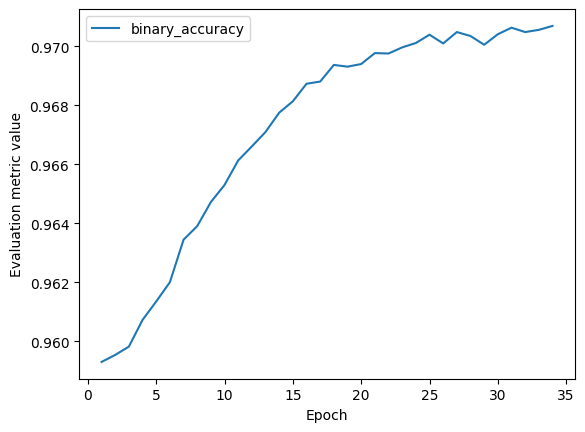

In [ ]:
# defining values for NN_model tuned hyperprameters
epochs = 35
batch_size = 64

# Train the model on the training set.
epochs, hist, history = train_NN_model(NN_model_tuned, X_train, y_train, X_val, y_val,
                           epochs, batch_size)

# Plot a graph of the evaluation metric vs. training epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_training_epochs_curve(epochs, hist, list_of_metrics_to_plot)

Evaluate NN_model over the test set after tuning hyperparameters:
226/226 [==============================] - 0s 2ms/step - loss: 0.0878 - binary_accuracy: 0.9696 - precision: 0.9976 - recall: 0.6597


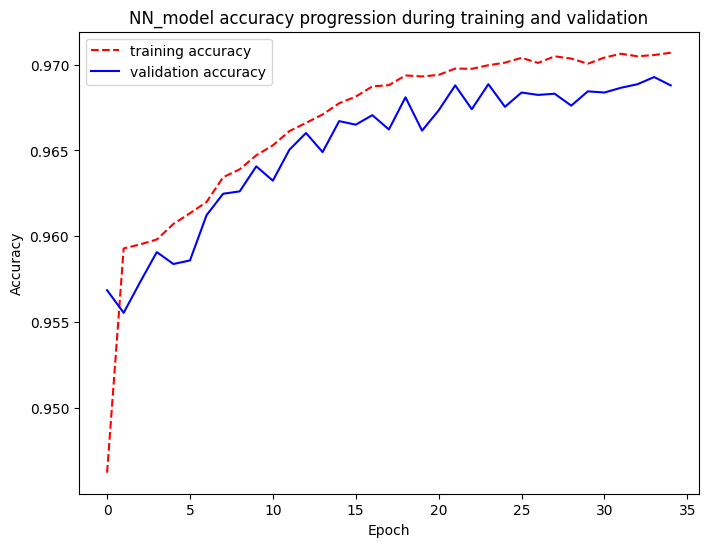

In [ ]:
# Evaluate the tuned NN_model against the test set using loss, binary_accuracy, precision and recall
print("Evaluate NN_model over the test set after tuning hyperparameters:")
NN_model_tuned.evaluate(x=X_test, y=y_test, batch_size=batch_size)

#Visualize the tuned NN_model performance on both the training and validation sets
#after tuning hyperparameters
plot_NN_learning_curve(history, epochs)
print("\n")
print("\n")

## **NN on the second dataset**

**Data splitting into training/testing/validation sets**

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_dataSplit(Diabetes2)
# checking number of examples in each set
print(f"Number of training examples: {X_train.shape[0]}")
print(f"Number of validation examples: {X_val.shape[0]}")
print(f"Number of testing examples: {X_test.shape[0]}")

Number of training examples: 537
Number of validation examples: 115
Number of testing examples: 116


**Neural Network model building and compiling**

In [ ]:
#building a neural network model with the previously user-defined function
learning_rate = 0.003
NN_model2 = create_NN_model(learning_rate)

**Neural Network model training**

Epoch 1/30
6/6 [==============================] - 2s 98ms/step - loss: 0.6805 - binary_accuracy: 0.6164 - precision: 0.4500 - recall: 0.4309 - val_loss: 0.6724 - val_binary_accuracy: 0.6435 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
6/6 [==============================] - 0s 18ms/step - loss: 0.6676 - binary_accuracy: 0.6648 - precision: 0.5571 - recall: 0.2074 - val_loss: 0.6573 - val_binary_accuracy: 0.6696 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
6/6 [==============================] - 0s 16ms/step - loss: 0.6627 - binary_accuracy: 0.6536 - precision: 0.5500 - recall: 0.0585 - val_loss: 0.6474 - val_binary_accuracy: 0.6696 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
6/6 [==============================] - 0s 19ms/step - loss: 0.6543 - binary_accuracy: 0.6518 - precision: 0.5238 - recall: 0.0585 - val_loss: 0.6405 - val_binary_accuracy: 0.6696 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
6/6 [============

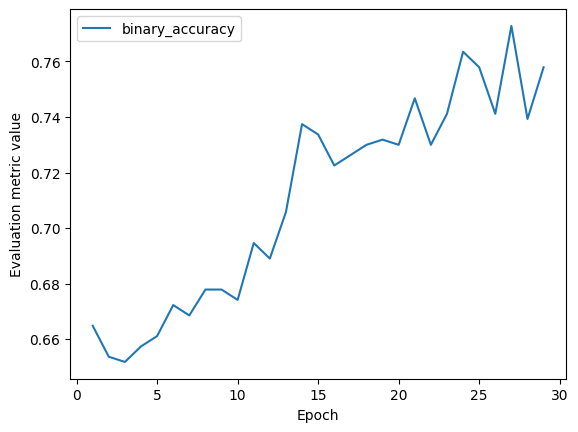

In [ ]:
# defining initial values for NN_model2 hyperprameters
epochs = 30
batch_size = 100

# Train the NN_model2 on the training set by the previously user-defined function.
epochs, hist, history = train_NN_model(NN_model2, X_train, y_train, X_val, y_val,
                           epochs, batch_size)

# Plot a graph of the evaluation metric vs. training epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_training_epochs_curve(epochs, hist, list_of_metrics_to_plot)

**Neural Network model evaluation**

In [ ]:
# Evaluate the NN_model2 against the test set using loss, binary_accuracy, precision and recall
print("Evaluate the new NN_model2 against the test set:")
NN_model2.evaluate(x=X_test, y=y_test, batch_size=batch_size)

Evaluate the new NN_model2 against the test set:
2/2 [==============================] - 0s 10ms/step - loss: 0.5391 - binary_accuracy: 0.7328 - precision: 0.6765 - recall: 0.5349


[0.5391424894332886, 0.732758641242981, 0.6764705777168274, 0.5348837375640869]

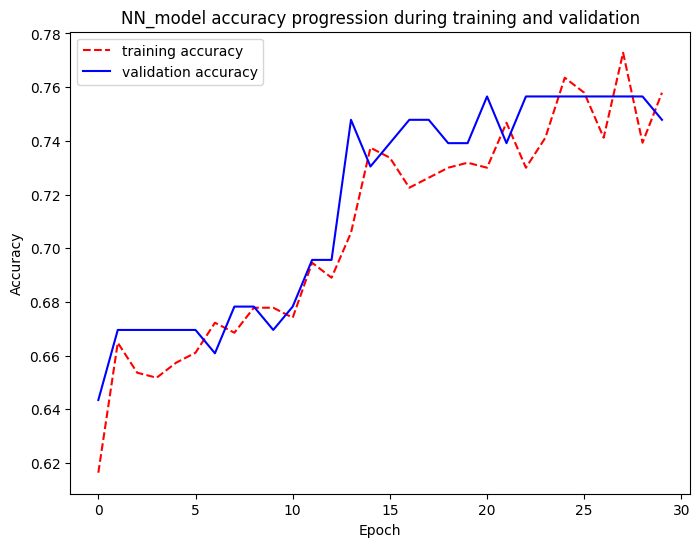

In [ ]:
#Visualize the NN model2 performance on both the training and validation sets
plot_NN_learning_curve(history, epochs)
print("\n")
print("\n")

**Improve the performance of the NN model on the second dataset**

Since the NN model performance on the second dataset was not good enough, we assume that the size of the dataset which is 768 records could be the reaason for the poor performance, so to have more data we will perform Data augmentation, which is a strategy that can help improve the performance of a model by increasing the size and diversity of the training data.
we will perform one of the common technique of Data augmentation for binary classification problems which is Synthetic Minority Over-sampling Technique (SMOTE). It is useful for imbalanced datasets like our case here.

In [ ]:
from imblearn.over_sampling import SMOTE

# creating a smote object and use it with fit_resample()
#to create new examples of the minority class(diabetes=1) in the training set
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

Epoch 1/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5282 - binary_accuracy: 0.7292 - precision: 0.8030 - recall: 0.6074 - val_loss: 0.5794 - val_binary_accuracy: 0.6957 - val_precision: 0.5200 - val_recall: 0.7027
Epoch 2/30
7/7 [==============================] - 0s 18ms/step - loss: 0.5131 - binary_accuracy: 0.7679 - precision: 0.7429 - recall: 0.8195 - val_loss: 0.6209 - val_binary_accuracy: 0.6522 - val_precision: 0.4746 - val_recall: 0.7568
Epoch 3/30
7/7 [==============================] - 0s 22ms/step - loss: 0.5002 - binary_accuracy: 0.7837 - precision: 0.7578 - recall: 0.8338 - val_loss: 0.5913 - val_binary_accuracy: 0.6957 - val_precision: 0.5192 - val_recall: 0.7297
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5024 - binary_accuracy: 0.7736 - precision: 0.7690 - recall: 0.7822 - val_loss: 0.5716 - val_binary_accuracy: 0.7043 - val_precision: 0.5306 - val_recall: 0.7027
Epoch 5/30
7/7 [==============================] - 0s 25ms/st

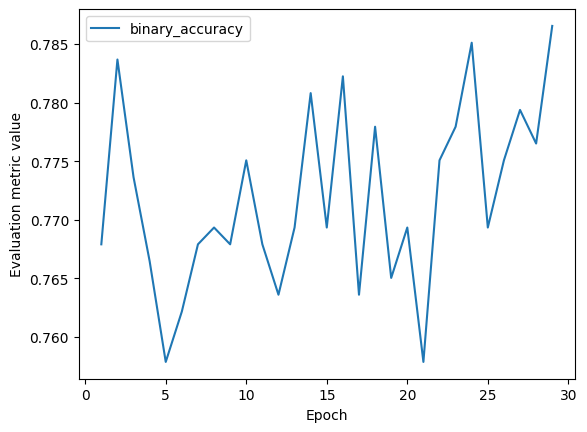

In [ ]:
#retrain the model after adding more examples in the training set
# defining initial values for NN_model2 hyperprameters
epochs = 30
batch_size = 100

# Train the NN_model2 on the resampled training set by the previously user-defined function.
epochs, hist, history = train_NN_model(NN_model2, X_res, y_res, X_val, y_val,
                           epochs, batch_size)

# Plot a graph of the evaluation metric vs. training epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_training_epochs_curve(epochs, hist, list_of_metrics_to_plot)

In [ ]:
# Evaluate the NN_model2 against the test set using loss, binary_accuracy, precision and recall
print("Evaluate the NN_model2 against the test set after resampling data by SMOTE:")
NN_model2.evaluate(x=X_test, y=y_test, batch_size=batch_size)

Evaluate the NN_model2 against the test set after resampling data by SMOTE:
2/2 [==============================] - 0s 16ms/step - loss: 0.5437 - binary_accuracy: 0.7155 - precision: 0.5926 - recall: 0.7442


[0.5437000393867493,
 0.7155172228813171,
 0.5925925970077515,
 0.7441860437393188]

After performing SMOTE technique for Data augmentation we will now try another useful technique for resampling imbalanced datasets in binary classification problems which is Adaptive Synthetic Sampling (ADASYN). to compare both techniques results and determine the best technique for resampling and balancing our dataset.

In [ ]:
from imblearn.over_sampling import ADASYN

# creating ADASYN object and use it with fit_resample()
#to create new examples of the minority class(diabetes=1) in the training set
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

Epoch 1/30
8/8 [==============================] - 0s 14ms/step - loss: 0.5105 - binary_accuracy: 0.7468 - precision: 0.7699 - recall: 0.7090 - val_loss: 0.5876 - val_binary_accuracy: 0.6783 - val_precision: 0.5000 - val_recall: 0.6757
Epoch 2/30
8/8 [==============================] - 0s 7ms/step - loss: 0.5169 - binary_accuracy: 0.7340 - precision: 0.7554 - recall: 0.6977 - val_loss: 0.5695 - val_binary_accuracy: 0.6957 - val_precision: 0.5208 - val_recall: 0.6757
Epoch 3/30
8/8 [==============================] - 0s 8ms/step - loss: 0.5183 - binary_accuracy: 0.7226 - precision: 0.7540 - recall: 0.6667 - val_loss: 0.5699 - val_binary_accuracy: 0.6957 - val_precision: 0.5208 - val_recall: 0.6757
Epoch 4/30
8/8 [==============================] - 0s 8ms/step - loss: 0.5125 - binary_accuracy: 0.7354 - precision: 0.7400 - recall: 0.7316 - val_loss: 0.5953 - val_binary_accuracy: 0.6783 - val_precision: 0.5000 - val_recall: 0.7568
Epoch 5/30
8/8 [==============================] - 0s 8ms/step -

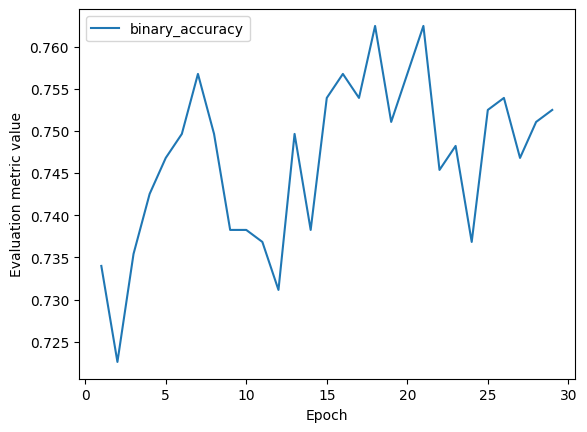

In [ ]:
#retrain the model after adding more examples in the training set
# defining initial values for NN_model2 hyperprameters
epochs = 30
batch_size = 100

# Train the NN_model2 on the resampled training set by the previously user-defined function.
epochs, hist, history = train_NN_model(NN_model2, X_res, y_res, X_val, y_val,
                           epochs, batch_size)

# Plot a graph of the evaluation metric vs. training epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_training_epochs_curve(epochs, hist, list_of_metrics_to_plot)

In [ ]:
# Evaluate the NN_model2 against the test set using loss, binary_accuracy, precision and recall
print("Evaluate the NN_model2 against the test set after resampling data by ADASYN:")
NN_model2.evaluate(x=X_test, y=y_test, batch_size=batch_size)

Evaluate the NN_model2 against the test set after resampling data by ADASYN:
2/2 [==============================] - 0s 9ms/step - loss: 0.5694 - binary_accuracy: 0.6897 - precision: 0.5574 - recall: 0.7907


[0.5694076418876648, 0.6896551847457886, 0.5573770403862, 0.7906976938247681]

**Neural Network model hyperparameters tuning**

**Tuning batch size and number of epochs**

In this experiment we will perform a GridSearch for tuning the batch size and the number of epochs.Their different values are specified in a dictionary and passed to GridSearchCV to find the best combinitation of these two hyperparameters.

In [ ]:
# create KerasClassifier model
model = KerasClassifier(model=create_NN_model, my_learning_rate=0.002, verbose=2)

# define the grid search parameters
batch_size = [32,64,92,128] #these values of batch sizes are common choices in tuning
epochs = [30, 40, 60]
param_grid = dict(batch_size=batch_size, epochs=epochs)

## grid search for the batch size and number of epochs
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best mean accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Epoch 1/60
17/17 - 1s - loss: 0.6703 - binary_accuracy: 0.6387 - precision: 0.4318 - recall: 0.1011 - 1s/epoch - 65ms/step
Epoch 2/60
17/17 - 0s - loss: 0.6565 - binary_accuracy: 0.6536 - precision: 0.7500 - recall: 0.0160 - 62ms/epoch - 4ms/step
Epoch 3/60
17/17 - 0s - loss: 0.6465 - binary_accuracy: 0.6499 - precision: 0.0000e+00 - recall: 0.0000e+00 - 68ms/epoch - 4ms/step
Epoch 4/60
17/17 - 0s - loss: 0.6332 - binary_accuracy: 0.6499 - precision: 0.5000 - recall: 0.0106 - 69ms/epoch - 4ms/step
Epoch 5/60
17/17 - 0s - loss: 0.6230 - binary_accuracy: 0.6629 - precision: 0.7059 - recall: 0.0638 - 67ms/epoch - 4ms/step
Epoch 6/60
17/17 - 0s - loss: 0.6040 - binary_accuracy: 0.6890 - precision: 0.8000 - recall: 0.1489 - 60ms/epoch - 4ms/step
Epoch 7/60
17/17 - 0s - loss: 0.5950 - binary_accuracy: 0.6909 - precision: 0.7895 - recall: 0.1596 - 59ms/epoch - 3ms/step
Epoch 8/60
17/17 - 0s - loss: 0.5854 - binary_accuracy: 0.6965 -

**Tuning the number of Neurons in the hidden layers**

In the following experiment, the hyperparameter that we will try to optimize via cross-validation is the number of neurons in the first hidden layer.

In [ ]:
#we will perform a GridSearch for tuning the neurons in the hidden layer
#where different values of neurons are specified in a dictionary and passed to GridSearchCV to find the best result.

# create KerasClassifier model
model = KerasClassifier(model=create_NN_model_n, epochs=60, batch_size=32, verbose=0)

# define the grid search parameters
neurons = [32,48,64,92,128,512] #powers of 2 as the number of neurons is a common choice
param_grid = dict(model__neurons=neurons)

## grid search for the number of nuerons in the first hidden layer.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best mean accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best mean accuracy: 0.776536 using {'model__neurons': 512}
0.756052 (0.020569) with: {'model__neurons': 32}
0.769088 (0.027871) with: {'model__neurons': 48}
0.774674 (0.018435) with: {'model__neurons': 64}
0.774674 (0.011479) with: {'model__neurons': 92}
0.772812 (0.013935) with: {'model__neurons': 128}
0.776536 (0.022807) with: {'model__neurons': 512}


**Tuning the Activation Function in the hidden layers**

In the following experiment, the hyperparameter that we will try to optimize via cross-validation is the activation function type in the first hidden layer.

In [ ]:
#we will perform a GridSearch for tuning the activations
#where different types of activation functions are specified in a dictionary and passed to GridSearchCV to find the best result.

#create KerasClassifier model
model = KerasClassifier(model=create_NN_model_a, epochs=60, batch_size=32, verbose=0)

# define the grid search parameters
activations = ['linear','sigmoid','relu']
param_grid = dict(model__activations=activations)

## grid search for activation function
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best mean accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best mean accuracy: 0.769088 using {'model__activations': 'relu'}
0.767225 (0.011479) with: {'model__activations': 'linear'}
0.746741 (0.006968) with: {'model__activations': 'sigmoid'}
0.769088 (0.018435) with: {'model__activations': 'relu'}


**Optimizing the model by trying different drop out rates for the regularization layer.**


In the following experiment, the hyperparameter that we will try to optimize via cross-validation is the drop out rate for the regularization layer.


In [ ]:
#create KerasClassifier model
model = KerasClassifier(model=create_NN_model_d, epochs=60, batch_size=32, verbose=0)

# define the grid search parameters
drop_rate = [0.1,0.2,0.3,0.4] #different values for the dropout rate to try
param_grid = dict(model__drop_rate=drop_rate)

## grid search for activation function
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best mean accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best mean accuracy: 0.776536 using {'model__drop_rate': 0.3}
0.769088 (0.016019) with: {'model__drop_rate': 0.1}
0.772812 (0.011479) with: {'model__drop_rate': 0.2}
0.776536 (0.013684) with: {'model__drop_rate': 0.3}
0.774674 (0.022501) with: {'model__drop_rate': 0.4}


**Setting the tuned hyperparameters values for the new tuned NN_model2**

After performing the previous experiments where we tuned multiple hyperparameters of the NN_model2 such as batch size, num of epochs, num of neurons in the hidden layer, activation function type in the hidden layer and finally the drop out rate.
now we will use the obtained best values for these hyperparameters to build a new tuned NN_model2, to train it on the training set and evaluate it's performance on testing set combared to the previous untuned NN_model2.

In [ ]:
# a function for creating and compiling a new tuned neural network model
# the passed parameter is a specified learning rate
def create_tuned_NN_model2(my_learning_rate):

  # initialize a new sequential model
  model = tf.keras.models.Sequential()

  # Define the input layer or the first hidden layer.
  # which 128 neurons and relu as an activation function
  # input shape=8 because we have 8 predictors as an input without the target
  model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

  # Define a dropout regularization layer with a dropout rate=30%.
  model.add(tf.keras.layers.Dropout(rate=0.3))

  # Define the output layer. The units parameter is set to 1 because
  # the model must choose among 2 possible output values (representing
  # whether a patient has diabetes or not).
  # with 'sigmoid' as an activation function for binary classification
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # Construct the layers into a model that TensorFlow can execute.
  # compile the model by using Adam optimization algorithm
  # the loss function for binary classification is 'binary_crossentropy'
  # accuracy, precision, and recall are used as evaluation metrics for model performance
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss='binary_crossentropy',
                 metrics=[metrics.BinaryAccuracy(),
                          metrics.Precision(),
                          metrics.Recall()])

  return model

print('function defined successfuly')

function defined successfuly


In [ ]:
#building a neural network model
learning_rate = 0.002
NN_model2_tuned = create_tuned_NN_model2(learning_rate)

Epoch 1/60
17/17 [==============================] - 1s 24ms/step - loss: 0.6655 - binary_accuracy: 0.6499 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00 - val_loss: 0.6397 - val_binary_accuracy: 0.6783 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/60
17/17 [==============================] - 0s 8ms/step - loss: 0.6508 - binary_accuracy: 0.6480 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00 - val_loss: 0.6236 - val_binary_accuracy: 0.6783 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 3/60
17/17 [==============================] - 0s 8ms/step - loss: 0.6255 - binary_accuracy: 0.6611 - precision_9: 1.0000 - recall_9: 0.0319 - val_loss: 0.6116 - val_binary_accuracy: 0.6870 - val_precision_9: 0.6667 - val_recall_9: 0.0541
Epoch 4/60
17/17 [==============================] - 0s 8ms/step - loss: 0.6056 - binary_accuracy: 0.7058 - precision_9: 0.8000 - recall_9: 0.2128 - val_loss: 0.5952 - val_binary_accuracy: 0.6870 - val_precision_9: 0.5714 - val_recall_9

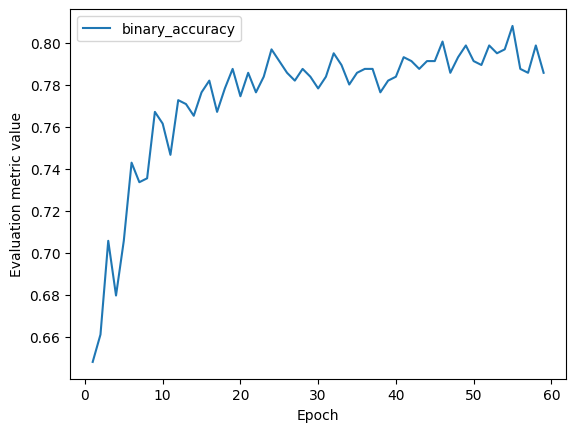

In [ ]:
# defining values for NN_model2 tuned hyperprameters
epochs = 60
batch_size = 32

# Train the model on the training set.
epochs, hist, history = train_NN_model(NN_model2_tuned, X_train, y_train, X_val, y_val,
                           epochs, batch_size)

# Plot a graph of the evaluation metric vs. training epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_training_epochs_curve(epochs, hist, list_of_metrics_to_plot)

Evaluate NN_model2 over the test set after tuning hyperparameters:
4/4 [==============================] - 0s 4ms/step - loss: 0.4916 - binary_accuracy: 0.7672 - precision_9: 0.7105 - recall_9: 0.6279


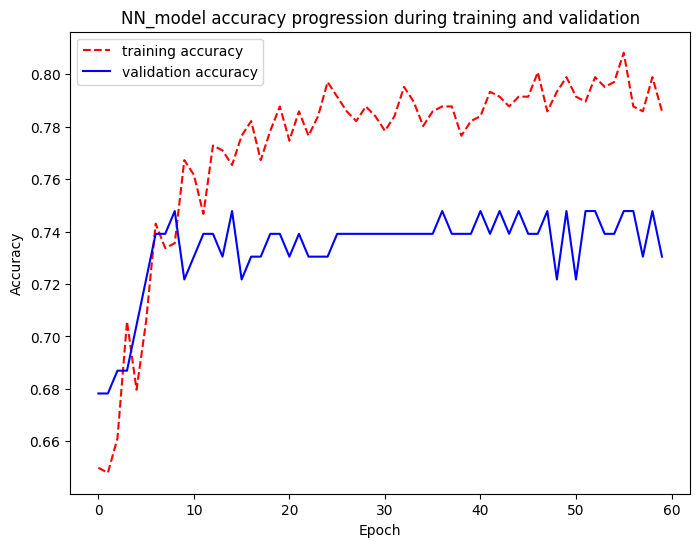

In [ ]:
# Evaluate the tuned NN_model2 against the test set using loss, binary_accuracy, precision and recall
print("Evaluate NN_model2 over the test set after tuning hyperparameters:")
NN_model2_tuned.evaluate(x=X_test, y=y_test, batch_size=batch_size)

#Visualize the tuned NN_model2 performance on both the training and validation sets
#after tuning hyperparameters
plot_NN_learning_curve(history, epochs)
print("\n")
print("\n")

# ***Support Vector Machine (SVM)***

## **SVM on the first dataset**

In [ ]:
# Importing the required libraries
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

In [ ]:
#splitting Diabetes1 to 80% training 20% testing
X_train, X_test, y_train, y_test= split_dataset_train_test(Diabetes1)

In [ ]:
# Standardize the features by scaling them
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predict the target variable for the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy, precision, recall, f1scores of the classifier
# by using the previous user-defined function
print("Performance of svm model on the test set:")
assess_model_performance(y_test, y_pred)

Performance of svm model on the test set:
Accuracy= 0.9569333194632269
Precisions= 0.9098591549295775
Recalls= 0.5696649029982364
F1 Score= 0.700650759219089

 Confusion matrix:
[[17429    96]
 [  732   969]]


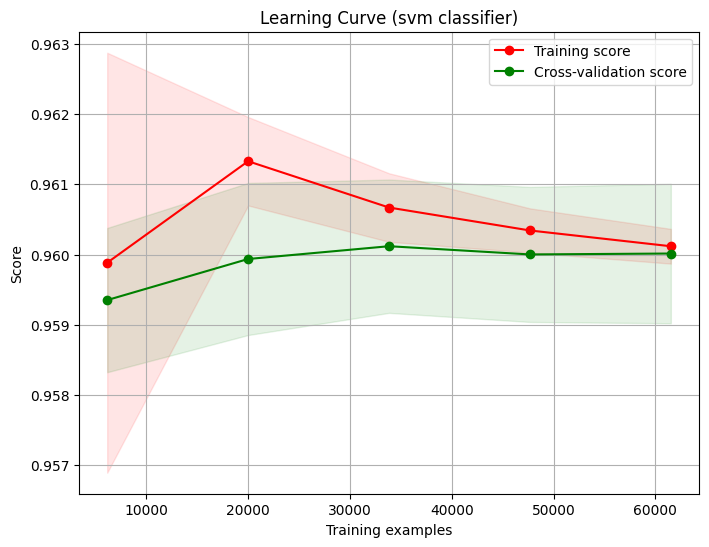

In [ ]:
#ploting the learning curve of svm model
plot_learning_curve(svm_classifier, X_train, y_train, title="Learning Curve (svm classifier)")
plt.show()


**Finding the optimal threshold and balancing data**

Precisions: [0.5        0.50000357 0.50000713 0.5000107  0.50001426]
Recalls: [1. 1. 1. 1. 1.]
Thresholds: [2.96206139e-07 3.40833925e-07 3.55264259e-07 3.55685831e-07
 3.63344176e-07]
Fscores: [0.66666667 0.66666984 0.666673   0.66667617 0.66667934]
Optimal threshold: 0.047600780537896625
F score: 0.883414216000594


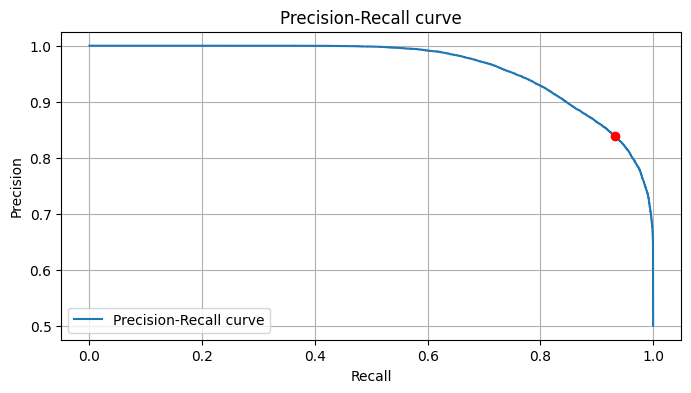

In [ ]:
from imblearn.over_sampling import SMOTE
# creating a smote object and use it with fit_resample()
#to create new examples of the minority class(diabetes=1) in the training set
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Initialize SVM model
svm_model = svm.SVC(kernel='linear', probability=True)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Plot the Precision-Recall curve and finding optimal threshold after balancing data
find_optimal_threshold(svm_model, X_res, y_res)


In [ ]:
# Adjusting the threshold
# Any data point with a probability of 0.04760 or higher will be classified as 1.
OPTIMAL_THRESHOLD =  0.04760

y_pred = np.where(svm_model.predict_proba(X_res)[:,1] >= OPTIMAL_THRESHOLD, 1, 0)
print(y_pred[:5]) #print the first 5 model predictions for y-labels based on the adjusted threshold

y_pred_proba= svm_model.predict_proba(X_res)[:,1]
print(y_pred_proba[:7]) #print the first 5 model predictions for the prprobabilities of pos class

[0 1 0 0 0]
[6.49920222e-07 9.95819048e-01 8.44084560e-04 1.08243928e-03
 5.38675208e-03 4.36885810e-03 1.12162537e-05]


In [ ]:
## calculate Accuracy, Precision, Recall, f1scores
#after adjusting the threshold
print("SVM model performance after adjusting the threshold to 0.04760:")
assess_model_performance(y_res, y_pred)

SVM model performance after adjusting the threshold to 0.04760:
Accuracy= 0.8768343292309009
Precisions= 0.8386129478702138
Recalls= 0.9332724861311162
F1 Score= 0.883414216000594

 Confusion matrix:
[[57527 12594]
 [ 4679 65442]]


**SVM Model Hyperparameters Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf','poly'],
    'gamma': ['scale', 'auto'],
}

# Create a base model
svm_model = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, verbose=2, scoring='recall')

# Fitting on training sets
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=  20.3s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=  20.4s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=  20.3s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=  22.6s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=  23.6s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  41.9s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  47.6s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  42.2s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  46.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  45.5s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=  23.5s
[CV] END ...................C=0.01, gamma=scale,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='recall', verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Set the best parameters for the SVM model
svm_model = svm.SVC(kernel='linear')

svm_model.set_params(C=1, gamma='scale',)

# retrain the tuned SVM model on the training set
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
print("SVM model performance on test set after hyperparameter tunning:")
y_pred= svm_model.predict(X_test)
assess_model_performance(y_test, y_pred)

SVM model performance on test set after hyperparameter tunning:
Accuracy= 0.9569333194632269
Precisions= 0.9098591549295775
Recalls= 0.5696649029982364
F1 Score= 0.700650759219089

 Confusion matrix:
[[17429    96]
 [  732   969]]


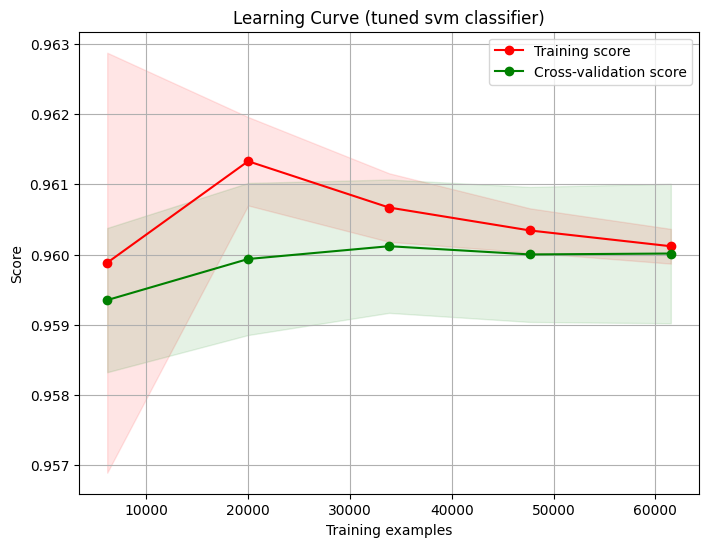

In [ ]:
#ploting the learning curve of svm model
plot_learning_curve(svm_model, X_train, y_train, title="Learning Curve (tuned svm classifier)")
plt.show()

## **SVM on the second dataset**

In [ ]:
#splitting Diabetes2 to 80% training 20% testing
X_train, X_test, y_train, y_test= split_dataset_train_test(Diabetes2)

In [ ]:
# Standardize the features by scaling them
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the SVM classifier
svm_classifier2 = svm.SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier2.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predict the target variable for the test data
y_pred = svm_classifier2.predict(X_test)

# Calculate the accuracy, precision, recall, f1scores of the classifier
# by using the previous user-defined function
print("Performance of svm model on the test set:")
assess_model_performance(y_test, y_pred)

Performance of svm model on the test set:
Accuracy= 0.7597402597402597
Precisions= 0.6730769230769231
Recalls= 0.6363636363636364
F1 Score= 0.6542056074766355

 Confusion matrix:
[[82 17]
 [20 35]]


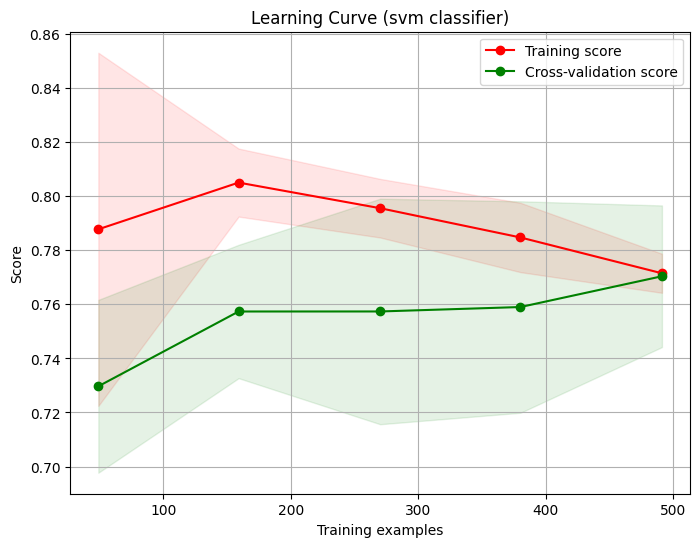

In [ ]:
#ploting the learning curve of svm model
plot_learning_curve(svm_classifier2, X_train, y_train, title="Learning Curve (svm classifier)")
plt.show()



**Finding the optimal threshold and balancing data**

Precisions: [0.5        0.50062422 0.50125    0.50187735 0.50250627]
Recalls: [1. 1. 1. 1. 1.]
Thresholds: [0.01796455 0.01831822 0.02143117 0.02295872 0.02307352]
Fscores: [0.66666667 0.6672213  0.66777685 0.66833333 0.66889074]
Optimal threshold: 0.23380527606147508
F score: 0.7956284153005464


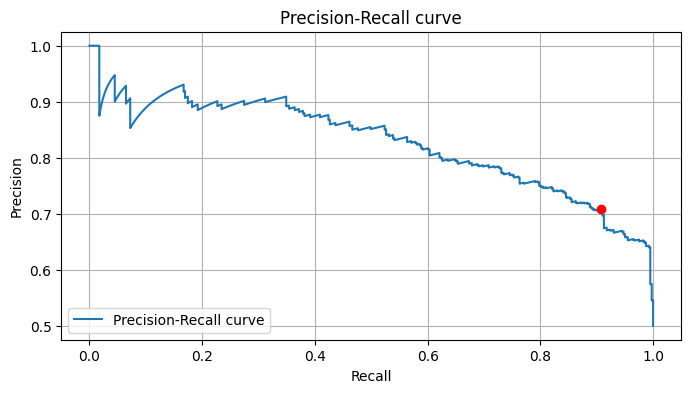

In [ ]:
from imblearn.over_sampling import SMOTE
# creating a smote object and use it with fit_resample()
#to create new examples of the minority class(diabetes=1) in the training set
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Initialize SVM model
svm_model = svm.SVC(kernel='linear', probability=True)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Plot the Precision-Recall curve and finding optimal threshold after balancing data
find_optimal_threshold(svm_model, X_res, y_res)

In [ ]:
# Adjusting the threshold
# Any data point with a probability of 0.2338 or higher will be classified as 1.
OPTIMAL_THRESHOLD = 0.2338

y_pred = np.where(svm_model.predict_proba(X_res)[:,1] >= OPTIMAL_THRESHOLD, 1, 0)
print(y_pred[:5]) #print the first 5 model predictions for y-labels based on the adjusted threshold

y_pred_proba= svm_model.predict_proba(X_res)[:,1]
print(y_pred_proba[:7]) #print the first 5 model predictions for the prprobabilities of pos class

[0 1 1 1 1]
[0.07272995 0.41772872 0.36204245 0.6091283  0.70412192 0.17250638
 0.34843854]


In [ ]:
## calculate Accuracy, Precision, Recall, f1scores
#after adjusting the threshold
print("SVM model performance after adjusting the threshold to 0.2338:")
assess_model_performance(y_res, y_pred)

SVM model performance after adjusting the threshold to 0.2338:
Accuracy= 0.7655860349127181
Precisions= 0.7076023391812866
Recalls= 0.9052369077306733
F1 Score= 0.7943107221006565

 Confusion matrix:
[[251 150]
 [ 38 363]]


**SVM Model Hyperparameters Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear','rdf','poly','rbf'],
    'gamma': ['scale', 'auto'],
}

# Create a base model
svm_model = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=2, scoring='recall')

# Fitting on training sets
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rdf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rdf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rdf; total time=   0.0s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rdf', 'poly', 'rbf']},
             scoring='recall', verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Set the best parameters for the SVM model
svm_model = svm.SVC(kernel='linear', probability=True)

svm_model.set_params(C=1, gamma='scale')

# retrain the tuned SVM model on the training set
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

In [ ]:
print("SVM model performance on test set after hyperparameter tunning:")
y_pred= svm_model.predict(X_test)
assess_model_performance(y_test, y_pred)

SVM model performance on test set after hyperparameter tunning:
Accuracy= 0.7597402597402597
Precisions= 0.6730769230769231
Recalls= 0.6363636363636364
F1 Score= 0.6542056074766355

 Confusion matrix:
[[82 17]
 [20 35]]


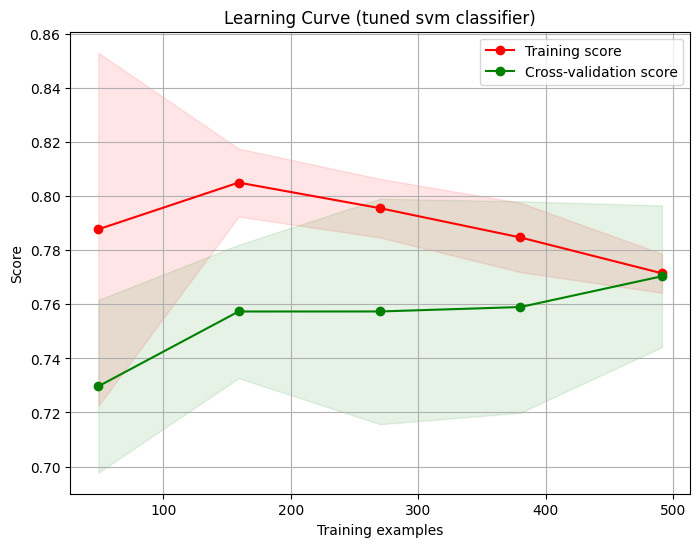

In [ ]:
#ploting the learning curve of svm model
plot_learning_curve(svm_model, X_train, y_train, title="Learning Curve (tuned svm classifier)")
plt.show()

# ***Random Forest (RF)***

## **RF on the first dataset**

**Data splitting**

In [ ]:
#splitting Diabetes1 to 80% training 20% testing
X_train, X_test, y_train, y_test= split_dataset_train_test(Diabetes1)

In [ ]:
#scale the feature variables of our dataset
#This function standardize the features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)

**Training and performing cross-validation to improve model generalization**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#initialization and training of random forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training set to test model generalization
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores of RF model: ", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score of RF model: ", cv_scores.mean())

Cross-validation scores of RF model:  [0.96827254 0.97041805 0.96905072 0.96950585 0.96872562]
Mean cross-validation score of RF model:  0.969194555388917


**Evaluating the Model**

In [ ]:
#generate predictions on the test set and evaluate them
y_pred = rfc.predict(X_test)
assess_model_performance(y_test, y_pred)

Accuracy= 0.9664516800166442
Precisions= 0.9342105263157895
Recalls= 0.6678424456202234
F1 Score= 0.7788824134384641

 Confusion matrix:
[[17445    80]
 [  565  1136]]


The results of RF model evaluation show that:
*   accuracy=96.6% of total predictions were correct
*   Precisions=93.42% of predicted paitents with diabetes actually had diabetes
*   recall= out of all the patients who actually have diabetes, the LR model only identifies 67% of them. higher recall is a priority here
*   low F1 because recall and Precisions are not balanced(lower recall)

**Plot the learning curve**

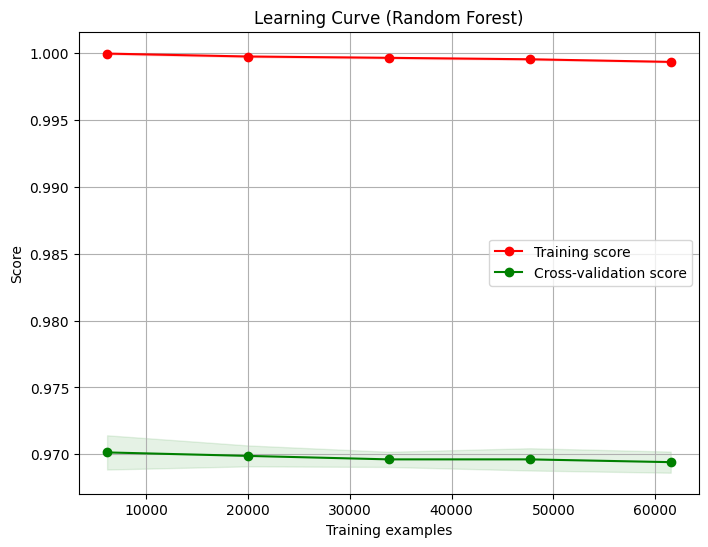

In [ ]:
plot_learning_curve(rfc, X_train, y_train, title="Learning Curve (Random Forest)")
plt.show()

**Adjusting the threshold of RF model and finding the optimal threshold**

In [ ]:
from imblearn.over_sampling import SMOTE
# creating a smote object and use it with fit_resample()
#to create new examples of the minority class(diabetes=1) in the training set
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

Precisions: [0.5        0.80661102 0.80662964 0.80669969 0.80693304]
Recalls: [1.         0.99632065 0.99632065 0.99629212 0.99623508]
Thresholds: [0.         0.002      0.0025     0.00333333 0.004     ]
Fscores: [0.66666667 0.89148494 0.89149631 0.89152767 0.89164731]
Optimal threshold: 0.12066666666666666
F score: 0.9724059819502657


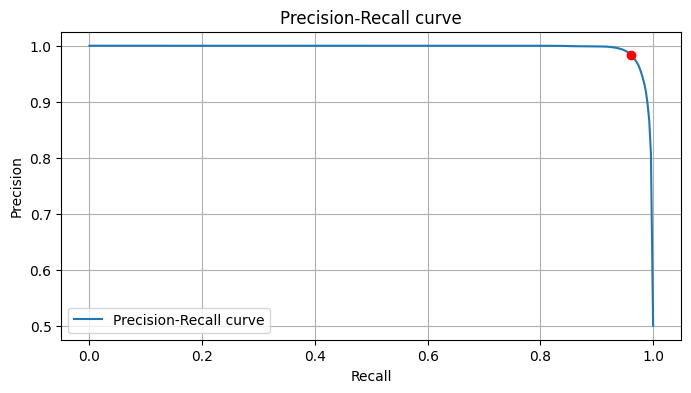

In [ ]:
#finding the optimal threshold by using the previously user-defined function
find_optimal_threshold(rfc, X_res, y_res)

In [ ]:
# Adjusting the threshold to 0.12
# Any data point with a probability  of 0.12 or higher will be classified as 1.
OPTIMAL_THRESHOLD = 0.12

y_pred = np.where(rfc.predict_proba(X_res)[:,1] >= OPTIMAL_THRESHOLD, 1, 0)
print(y_pred[:5]) #print the first 5 model predictions for y-labels based on the adjusted threshold

y_pred_proba= rfc.predict_proba(X_res)[:,1]
print(y_pred_proba[:5]) #print the first 5 model predictions for the prprobabilities of pos class


## calculate Accuracy, Precision, Recall, f1scores
#after adjusting the threshold to 0.12
print("\n RF model performance after adjusting the threshold to 0.12 ")
assess_model_performance(y_res, y_pred)

[0 1 0 0 0]
[0.   0.99 0.   0.   0.  ]

 RF model performance after adjusting the threshold to 0.12 
Accuracy= 0.9722764934898247
Precisions= 0.9803042828757488
Recalls= 0.9639195105603172
F1 Score= 0.9720428561156252

 Confusion matrix:
[[68763  1358]
 [ 2530 67591]]


**RF model hyperparamaters tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rfc = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
#make predictions and evaluate them after tuning hyperparameters
#by using the best rf model
y_pred = best_rfc.predict(X_test)
assess_model_performance(y_test, y_pred)

Accuracy= 0.9693123894725892
Precisions= 0.9894273127753304
Recalls= 0.6601998824221046
F1 Score= 0.7919605077574049

 Confusion matrix:
[[17513    12]
 [  578  1123]]


**plot the learning curve**

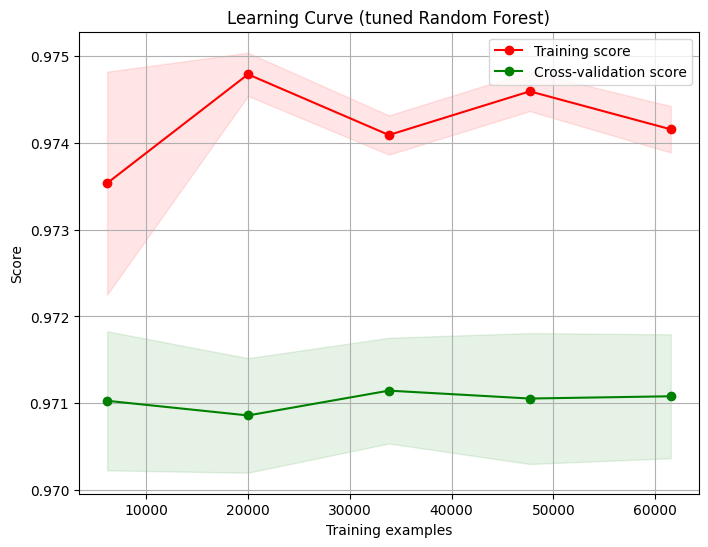

In [ ]:
plot_learning_curve(best_rfc, X_train, y_train, title="Learning Curve (tuned Random Forest)")
plt.show()

## **RF on the second dataset**

**Data splitting**

In [ ]:
#splitting Diabetes2 to 80% training 20% testing
X_train, X_test, y_train, y_test= split_dataset_train_test(Diabetes2)

In [ ]:
#scale the feature variables of our dataset
#This function standardize the features by removing the mean and scaling to unit variance.
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)


**Training and performing cross-validation to improve model generalization**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#initialization and training of random forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Perform cross-validation on the training set to test model generalization
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores of RF model: ", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score of RF model: ", cv_scores.mean())

Cross-validation scores of RF model:  [0.77235772 0.79674797 0.74796748 0.70731707 0.7704918 ]
Mean cross-validation score of RF model:  0.7589764094362256


**Evaluating the model**

In [ ]:
#generate predictions on the test set and evaluate them
#by using the previously user-defined function
y_pred = rfc.predict(X_test)
assess_model_performance(y_test, y_pred)

Accuracy= 0.7532467532467533
Precisions= 0.6491228070175439
Recalls= 0.6727272727272727
F1 Score= 0.6607142857142858

 Confusion matrix:
[[79 20]
 [18 37]]


The results of RF model evaluation show that:
*   accuracy=75.3% of total predictions were correct
*   Precisions=64.9% of predicted paitents with diabetes actually had diabetes
*   recall= out of all the patients who actually have diabetes, the LR model only identifies 67% of them. higher recall is a priority here
*   low F1 because recall and Precisions are not balanced(both are low)

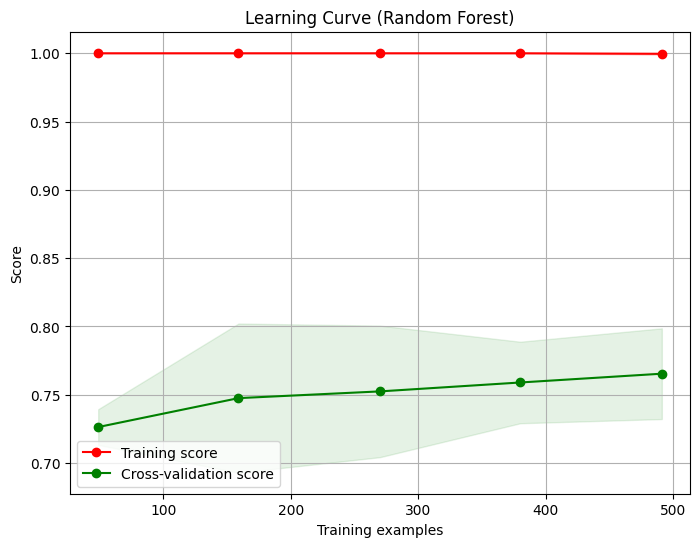

In [ ]:
#plotting the learning curve of RF model
plot_learning_curve(rfc, X_train, y_train, title="Learning Curve (Random Forest)")
plt.show()

**Adjusting the threshold of RF model and finding the optimal threshold**

In [ ]:
# creating a smote object and use it with fit_resample()
#to create new examples of the minority class(diabetes=1) in the training set
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

Precisions: [0.5        0.53112583 0.55771905 0.56798867 0.58711567]
Recalls: [1. 1. 1. 1. 1.]
Thresholds: [0.   0.01 0.02 0.03 0.04]
Fscores: [0.66666667 0.69377163 0.71607143 0.72448058 0.7398524 ]
Optimal threshold: 0.34
F score: 0.9912390488110138


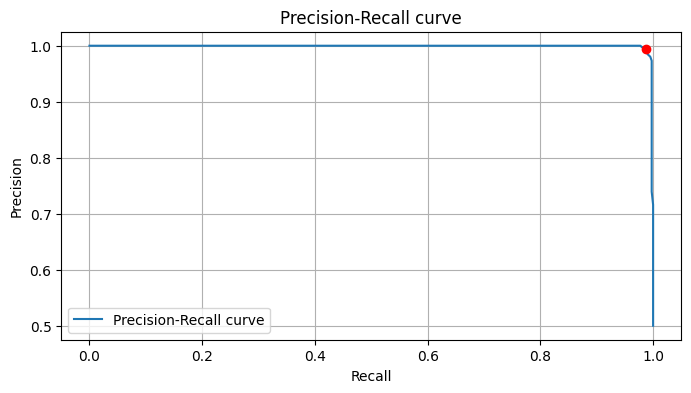

In [ ]:
#finding the optimal threshold by using the previously user-defined function
find_optimal_threshold(rfc, X_res, y_res)

In [ ]:
# Adjusting the threshold to the optimal threshold which is 0.34

# Any data point with a probability of 0.34 or higher will be classified as 1.
OPTIMAL_THRESHOLD = 0.34

y_pred = np.where(rfc.predict_proba(X_res)[:,1] >= OPTIMAL_THRESHOLD, 1, 0)
print(y_pred[:5]) #print the first 5 model predictions for y-labels based on the adjusted threshold

y_pred_proba= rfc.predict_proba(X_res)[:,1]
print(y_pred_proba[:5]) #print the first 5 model predictions for the prprobabilities of pos class


## calculate Accuracy, Precision, Recall, f1scores
#after adjusting the threshold to 0.34
print("RF model performance after adjusting threshold to the optimal threshold of 0.34 ")
assess_model_performance(y_res, y_pred)

[0 1 0 0 1]
[0.   0.86 0.06 0.22 0.84]
RF model performance after adjusting threshold to the optimal threshold of 0.34 
Accuracy= 0.9912718204488778
Precisions= 0.9949748743718593
Recalls= 0.9875311720698254
F1 Score= 0.9912390488110138

 Confusion matrix:
[[399   2]
 [  5 396]]


**RF model hyperparamaters tuning**

In [ ]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rfc = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
#generate predictions by the best RF model with tuned hyperparameters
#and evaluate them by using the previously user-defined function
y_pred = best_rfc.predict(X_test)
assess_model_performance(y_test, y_pred)

Accuracy= 0.7532467532467533
Precisions= 0.6491228070175439
Recalls= 0.6727272727272727
F1 Score= 0.6607142857142858

 Confusion matrix:
[[79 20]
 [18 37]]


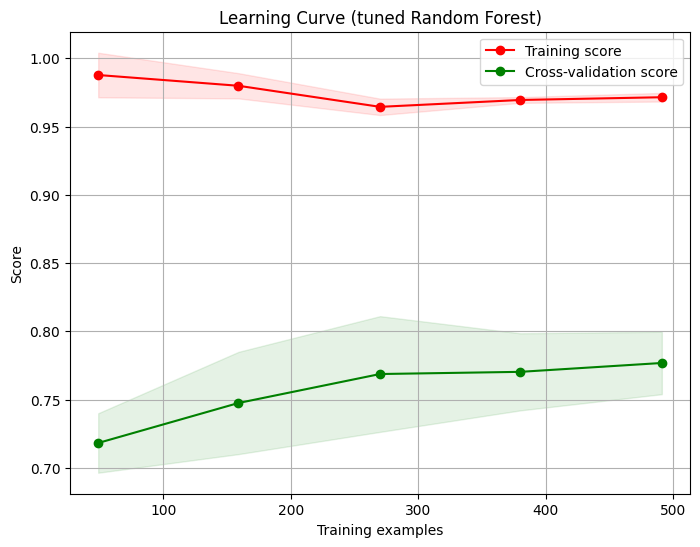

In [ ]:
#plotting the learning curve of the RF model
plot_learning_curve(best_rfc, X_train, y_train, title="Learning Curve (tuned Random Forest)")
plt.show()